# Churn Prediction

In [1]:
# Basic keyboard shortcuts to remember
# m for markdown and y for code

Lets quickly check what files and folders are present in our current folder path. 

In [2]:
! ls

13996_18858_bundle_archive.zip       churn-model-development.bin
WA_Fn-UseC_-Telco-Customer-Churn.csv churn_prediction_development-2.ipynb
archive


## Imports

In [3]:
# usual imports 
import numpy as np
import pandas as pd

import math

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# plt.style.use('seaborn')

from sklearn.metrics import confusion_matrix
import seaborn as sns


from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from collections import defaultdict
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import ipdb

## Basic Data Preparation
We will begin with initial data preparation.

In [4]:
# Read the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

**Basic information**
- We have 7043 rows and 21 columns
- Out of 21 columns, 19 are feature columns

In [6]:
df.shape

(7043, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.head(8).T

0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  \
customerID                       7795-CFOCW        9237-HQITU   
gender                                 Male            Female   
SeniorCitizen                             0                 0   
Partner                                  No                No   
Dependents                               No                No   
tenure                                   45                 2   
PhoneService                             No               Yes   
MultipleLines              No phone service                No   
InternetService                         DSL       Fiber optic   
OnlineSecurity                          Yes                No   
OnlineBackup                             No                No   
DeviceProtection                        Yes                No   
TechSupport                             Yes                No   
StreamingTV                              No                No   
StreamingMovies                          No                No   
Contract                           One year    Month-to-month   
PaperlessBilling                         No               Yes   
PaymentMethod     Bank transfer (automatic)  Electronic check   
MonthlyCharges                         42.3              70.7   
TotalCharges                        1840.75            151.65   
Churn                                    No               Yes   

                                 5                        6                 7  
customerID              9305-CDSKC               1452-KIOVK        6713-OKOMC  
gender                      Female                     Male            Female  
SeniorCitizen                    0                        0                 0  
Partner                         No                       No                No  
Dependents                      No                      Yes                No  
tenure                           8                       22                10  
PhoneService                   Yes                      Yes                No  
MultipleLines                  Yes                      Yes  No phone service  
InternetService        Fiber optic              Fiber optic               DSL  
OnlineSecurity                  No                       No               Yes  
OnlineBackup                    No                      Yes                No  
DeviceProtection               Yes                       No                No  
TechSupport                     No                       No      

**Target variable distribution**

Approximately 26% of customers have churned and rest have not. It can be said that data has mild imbalance ([reference](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)).

In [9]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

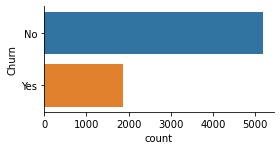

In [11]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2, aspect=2, orient='v')

In [12]:
churned_ratio = df.Churn.value_counts(normalize=True)['Yes']
churned_percentage = churned_ratio * 100
print("Churned percentage : {:.2f}%".format(churned_percentage))

Churned percentage : 26.54%


**Analyzing column data types and handling missing values**

We will analyze the data types of dataset and convert columns to appropriate data type if required. Below we observe that *TotalCharges* column should be numerical data type like float64 or int64 . At the same time,  we also observe that there are missing values in *TotalCharges* column. These missing values are strings with just single space values. We will handle them by imputing them to 0. Reason behind imputing them to 0 is that for all such customers, tenure is zero. It is safe to say that such customers never paid anything.

When we say missing values, we are going to take following into values into consideration:

- NaN
- Empty string
- Strings with just space in it.

Observations:
- There are 11 rows that have missing value in *TotalCharges* column.
- Other than *TotalCharges* column, no ther feature column has missing value. 

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Note**: There are no nan values in the dataframe.

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
len(df.columns)

21

In [16]:
np.where(df.applymap(lambda x: x == ' '))

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]),
 array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]))

In [17]:
total_charges = pd.to_numeric(df.TotalCharges, errors= 'coerce')
total_charges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [18]:
df[total_charges.isnull()][['customerID', 'tenure' ,'TotalCharges']]

customerID  tenure TotalCharges
488   4472-LVYGI       0             
753   3115-CZMZD       0             
936   5709-LVOEQ       0             
1082  4367-NUYAO       0             
1340  1371-DWPAZ       0             
3331  7644-OMVMY       0             
3826  3213-VVOLG       0             
4380  2520-SGTTA       0             
5218  2923-ARZLG       0             
6670  4075-WKNIU       0             
6754  2775-SEFEE       0

In [19]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors= 'coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

**Column names transformation**

We are going to keep column names uniform for the whole dataset. We will do lower casing and then replace spaces with  underscore.

In [20]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

**Categorical string columns values transformation**

We are going to change the values of features that are categorical in nature. Fom the data snapshot above, we can see all the columns that are of *object* data type are categorical.

In [21]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

In [22]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

**Predicted variable transformation**

We are going to change predicted variable to integer with churned customers set as 1 and 0 otherwise.

In [23]:
df.churn = (df.churn == 'yes').astype(int)

**Test dataset creation**

We are going to create training and test dataset and we will keep test dataset aside. 

We are also going to create a copy of training dataset which we will use for exploratory data analysis.

In [24]:
from sklearn.model_selection import train_test_split

df_train_full,  df_test = train_test_split(df, test_size= 0.2, random_state = 1)

In [25]:
df_train_full_explore = df_train_full.copy(deep = True)

In [26]:
df_train_full.head()

customerid  gender  seniorcitizen partner dependents  tenure  \
1814  5442-pptjy    male              0     yes        yes      12   
5946  6261-rcvns  female              0      no         no      42   
3881  2176-osjuv    male              0     yes         no      71   
2389  6161-erdgd    male              0     yes        yes      71   
3676  2364-ufrom    male              0      no         no      30   

     phoneservice multiplelines internetservice       onlinesecurity  ...  \
1814          yes            no              no  no_internet_service  ...   
5946          yes            no             dsl                  yes  ...   
3881          yes           yes             dsl                  yes  ...   
2389          yes           yes             dsl                  yes  ...   
3676          yes            no             dsl                  yes  ...   

         deviceprotection          techsupport          streamingtv  \
1814  no_internet_service  no_internet_service  no_internet_service   
5946                  yes                  yes                   no   
3881                   no                  yes                   no   
2389                  yes                  yes                  yes   
3676                   no                  yes                  yes   

          streamingmovies  contract paperlessbilling  \
1814  no_internet_service  two_year               no   
5946                  yes  one_year               no   
3881                   no  two_year               no   
2389                  yes  one_year               no   
3676                   no  one_year               no   

                  paymentmethod monthlycharges  totalcharges  churn  
1814               mailed_check          19.70        258.35      0  
5946    credit_card_(automatic)          73.90       3160.55      1  
3881  bank_transfer_(automatic)          65.15       4681.75      0  
2389           electronic_check          85.45       6300.85      0  
3676           electronic_check          70.40       2044.75      0  

[5 rows x 21 columns]

In [27]:
df_test.head()

customerid  gender  seniorcitizen partner dependents  tenure  \
3381  8879-zkjof  female              0      no         no      41   
6180  0201-mibol  female              1      no         no      66   
4829  1600-dilpe  female              0      no         no      12   
3737  8601-qacrs  female              0      no         no       5   
4249  7919-zodzz  female              0     yes        yes      10   

     phoneservice multiplelines internetservice onlinesecurity  ...  \
3381          yes            no             dsl            yes  ...   
6180          yes           yes     fiber_optic            yes  ...   
4829          yes            no             dsl             no  ...   
3737          yes           yes             dsl             no  ...   
4249          yes            no             dsl             no  ...   

     deviceprotection techsupport streamingtv streamingmovies        contract  \
3381              yes         yes         yes             yes        one_year   
6180               no          no         yes             yes        two_year   
4829               no          no          no              no  month-to-month   
3737               no          no          no              no  month-to-month   
4249              yes          no          no             yes        one_year   

     paperlessbilling              paymentmethod monthlycharges  totalcharges  \
3381              yes  bank_transfer_(automatic)          79.85       3320.75   
6180              yes  bank_transfer_(automatic)         102.40       6471.85   
4829              yes  bank_transfer_(automatic)          45.00        524.35   
3737              yes               mailed_check          50.60        249.95   
4249              yes               mailed_check          65.90        660.05   

      churn  
3381      0  
6180      0  
4829      0  
3737      1  
4249      0  

[5 rows x 21 columns]

In [28]:
df_train_full = df_train_full.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
y_train_full = df_train_full.churn.values
y_test = df_test.churn.values

In [30]:
df_train,  df_val = train_test_split(df_train_full, test_size= 0.33, random_state = 11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [31]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [32]:
df_train_full_explore.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [33]:
del df_train_full['churn']
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [34]:
df_train_full_explore.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

## Exploratory data analysis

### Types of features

We have numerical and categorical features as mentioned below:

- numerical: tenure, monthlycharges, totalcharges
- categorical: gender, seniorcitizen, partner, dependents, phoneservice, multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paperlessbilling, paymentmethod

In [35]:
categorical_features = [
    'gender', 'seniorcitizen', 'partner', 'dependents',
    'phoneservice', 'multiplelines', 'internetservice',
    'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies', 
    'contract', 'paperlessbilling', 'paymentmethod'
]
numerical_features = ['tenure', 'monthlycharges', 'totalcharges']

### Numerical feature analysis

We have three numerical features. We can analyze them using KDE plots. KDE plots depicts the probability density at different values in a continuous variable.

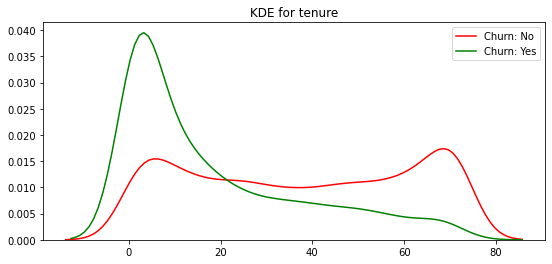

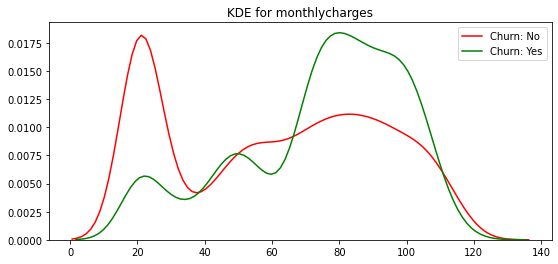

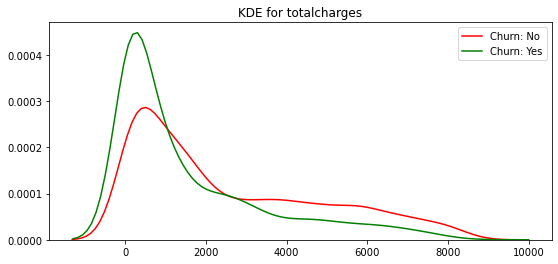

In [36]:
def kde_plot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df_train_full_explore[df_train_full_explore.churn == 0][feature], color= 'red', label= 'Churn: No')
    ax1 = sns.kdeplot(df_train_full_explore[df_train_full_explore.churn == 1][feature], color= 'green', label= 'Churn: Yes')

for feature in numerical_features:
    kde_plot(feature)

From above graphs, we can conclude following:
1. Customers with little tenure are more likely to churn
2. Customers with higher monthly charges are more likely to churn
3. It seems like tenure and monthly charges are important features as they are quite indicative of whether customer is going to churn or not.

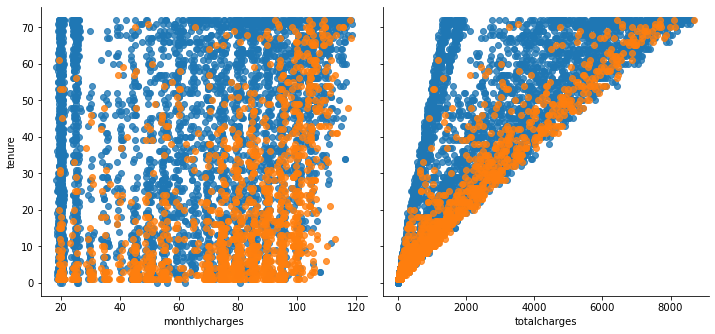

In [37]:
g = sns.PairGrid(df_train_full_explore, 
                 y_vars=["tenure"], 
                 x_vars=["monthlycharges", "totalcharges"], 
                 height=4.5, 
                 hue="churn", 
                 aspect=1.1
                )
# g = g.add_legend()
ax = g.map(plt.scatter, alpha=0.8)

In [38]:
df_train_full_explore_with_monthlycharges = df_train_full_explore[['monthlycharges', 'churn']]

In [39]:
df_train_full_explore['monthlycharges'].min(), df_train_full_explore['monthlycharges'].max()

(18.25, 118.65)

In [40]:
# df_train_full2 = df_train_full.copy(deep = True)
for col in numerical_features:
    df_train_full_explore[col +'_label'] = pd.cut(
        x = df_train_full_explore[col], bins = 3, labels= ['low', 'medium', 'high']
    )

In [41]:
df_train_full_explore.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn',
       'tenure_label', 'monthlycharges_label', 'totalcharges_label'],
      dtype='object')

Text(0.5, 0, 'Tenure groups')

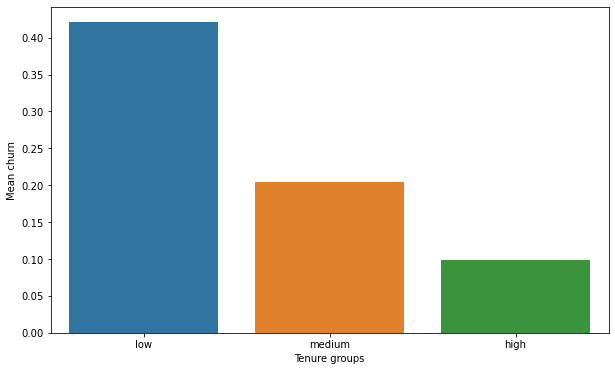

In [42]:
df_group = df_train_full_explore.groupby(by= 'tenure_label').churn.agg(['mean'])

plt.figure(figsize=(10,6))
sns.barplot(x= list(df_group.index), y= df_group['mean'])

# Add label for vertical axis
plt.ylabel("Mean churn")
plt.xlabel("Tenure groups")

Text(0.5, 0, 'Monthly charges groups')

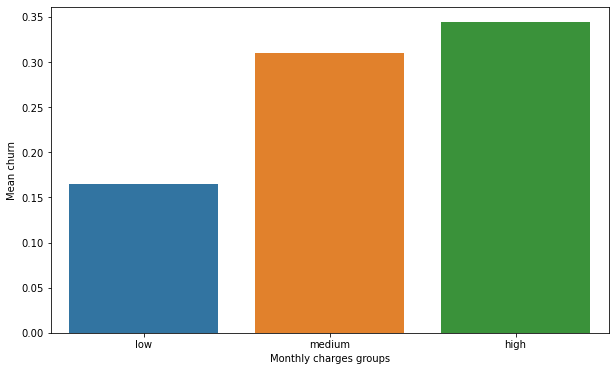

In [43]:
df_group = df_train_full_explore.groupby(by= 'monthlycharges_label').churn.agg(['mean'])

plt.figure(figsize=(10,6))
sns.barplot(x= list(df_group.index), y= df_group['mean'])
plt.ylabel("Mean churn")
plt.xlabel("Monthly charges groups")

Text(0.5, 0, 'Total charges groups')

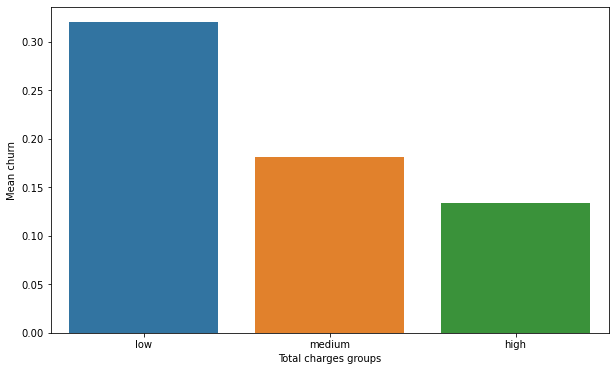

In [44]:
df_group = df_train_full_explore.groupby(by= 'totalcharges_label').churn.agg(['mean'])

plt.figure(figsize=(10,6))
sns.barplot(x= list(df_group.index), y= df_group['mean'])
plt.ylabel("Mean churn")
plt.xlabel("Total charges groups")

### Categorical feature analysis

We have 16 categorical features:
- 6 of these features are binary
- 9 of these features can have one of the 3 unique values
- 1 feature can take one of 4 unique values

In [45]:
len(categorical_features)

16

In [46]:
categorical_features_unique_count_series = df_train_full_explore[categorical_features].nunique()
categorical_features_unique_count_series

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [47]:
from collections import defaultdict
type_of_cat_feature_to_count =  defaultdict(int)
for i in range(len(categorical_features_unique_count_series)):
    key = "{}_unique_value".format(categorical_features_unique_count_series[i])
    type_of_cat_feature_to_count[key] += 1
pd.Series(type_of_cat_feature_to_count)

2_unique_value    6
3_unique_value    9
4_unique_value    1
dtype: int64

**Senior citizen,  gender and age**

seniorcitizen  churn  churn_count  percentage of customers
0              0      0         3578                 0.635073
1              0      1         1144                 0.203053
2              1      0          535                 0.094959
3              1      1          377                 0.066915

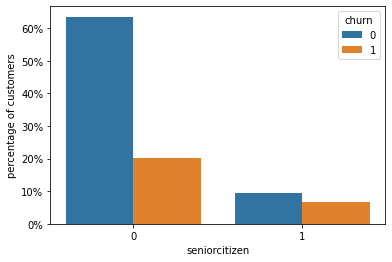

In [48]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    g = df_train_full_explore.groupby(feature)['churn'].value_counts().to_frame()
    g.columns = ['churn_count']
    g[axis_name] = g['churn_count'] / len(df_train_full_explore)
    g = g.reset_index()
    ax = sns.barplot(x=feature, y= axis_name, hue='churn', data=g, orient=orient)
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    ax.plot()
    return g

seniorcitizen_data = barplot_percentages('seniorcitizen')
seniorcitizen_data

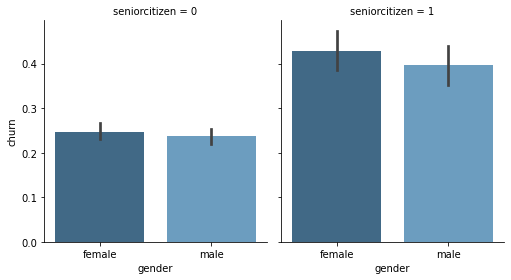

In [49]:
g = sns.FacetGrid(df_train_full_explore, col="seniorcitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn", palette = "Blues_d", order= ['female', 'male'])

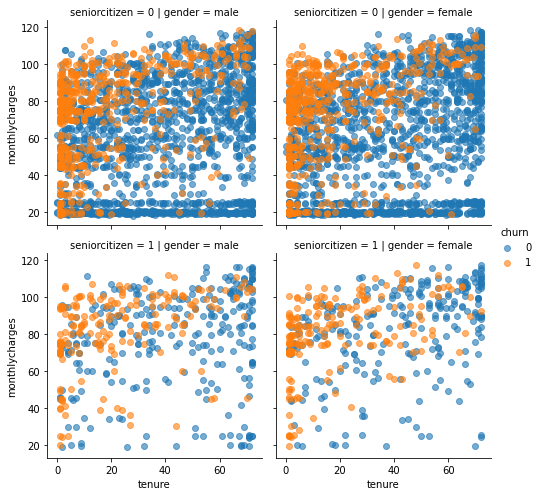

In [50]:
g = sns.FacetGrid(df_train_full_explore, row='seniorcitizen', col="gender", hue="churn", height=3.5)
g.map(plt.scatter, "tenure", "monthlycharges", alpha=0.6)
g.add_legend();

**Few observations**
- Gender is not a indicative feature of whether a customer would churn or not.
- Senior citizens are more likely to churn.
- There isn't any special relationship between numerical features and above discussed categorical variables.

**Partners and dependents**

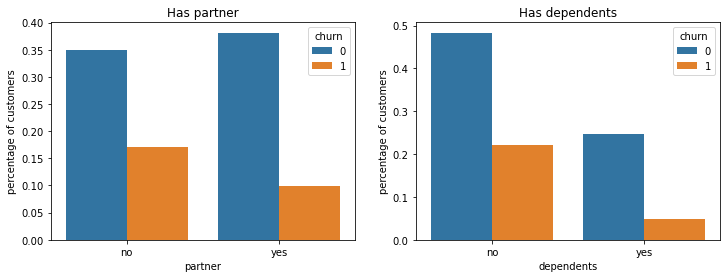

In [51]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df_train_full_explore.groupby('partner')["churn"].value_counts()/len(df_train_full_explore)
gp_partner = gp_partner.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='partner', y= axis_y, hue='churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df_train_full_explore.groupby('dependents')["churn"].value_counts()/len(df_train_full_explore)
gp_dep = gp_dep.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='dependents', y= axis_y, hue='churn', data=gp_dep, ax=axis[1])

**Few observations**
- Customers that don't have partners are more likely to churn
- Customers that don't have dependents are more likely to churn

**Phone and Internet services**

multiplelines  churn  percentage of customers
0                no      0                 0.355875
1                no      1                 0.123358
2  no_phone_service      0                 0.073660
3  no_phone_service      1                 0.023429
4               yes      0                 0.300497
5               yes      1                 0.123181

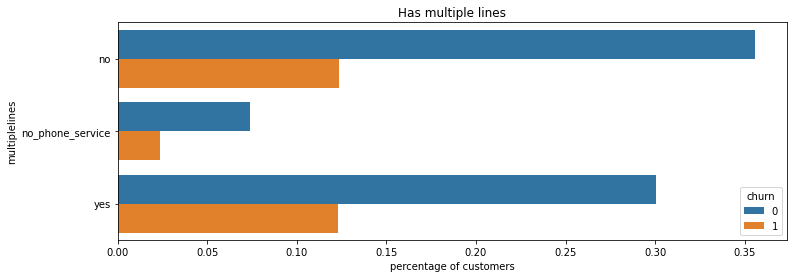

In [52]:
fig, axis = plt.subplots(1, 1, figsize=(12,4))
axis.set_title("Has multiple lines")
axis_y = "percentage of customers"
gp_multiplelines = df_train_full_explore.groupby('multiplelines')['churn'].value_counts()/len(df_train_full_explore)
gp_multiplelines = gp_multiplelines.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x=axis_y, y='multiplelines' , hue='churn', data=gp_multiplelines, ax=axis)
gp_multiplelines

**Observations**
- Very few customers have no phone service
- Customers with and without multiple lines have almost same churn rate. 

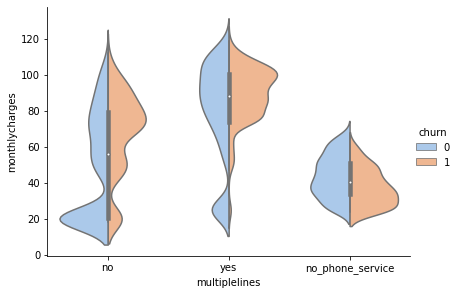

In [53]:
ax = sns.catplot(x="multiplelines", y="monthlycharges", hue="churn", kind="violin",
                 split=True, palette="pastel", data=df_train_full_explore, height=4.2, aspect=1.4)

**Internet services**

internetservice  churn  percentage of customers
0             dsl      0                 0.277245
1             dsl      1                 0.066028
2     fiber_optic      0                 0.252929
3     fiber_optic      1                 0.187078
4              no      0                 0.199858
5              no      1                 0.016862

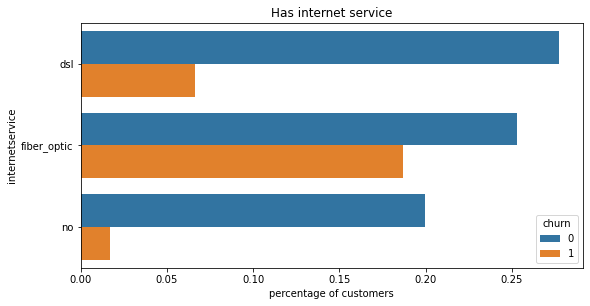

In [54]:
fig, axis = plt.subplots(1, 1, figsize=(9, 4.5))
axis.set_title("Has internet service")
axis_y = "percentage of customers"
gp_internetservice = df_train_full_explore.groupby('internetservice')['churn'].value_counts()/len(df_train_full_explore)
gp_internetservice = gp_internetservice.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x= axis_y, y= 'internetservice' , hue= 'churn', data= gp_internetservice, ax= axis)
gp_internetservice


- Customers with no internet service have very low churn rate
- Customers with fiber optic connection have very high churn rate

Analyzing monthly charges with internet services:

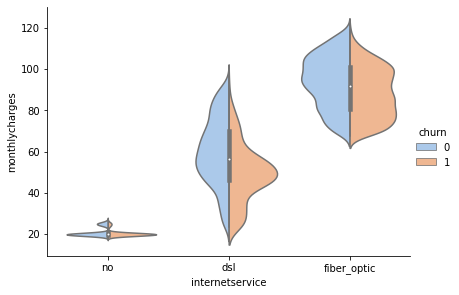

In [55]:
ax = sns.catplot(x="internetservice", y="monthlycharges", hue="churn", kind="violin",
                 split=True, palette="pastel", data=df_train_full_explore, height=4.2, aspect=1.4)

**Other internet related services**

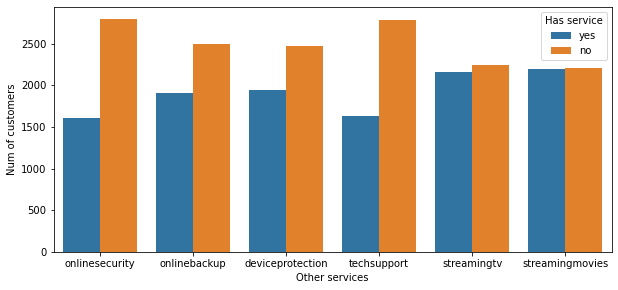

In [56]:
cols = ["onlinesecurity", "onlinebackup", "deviceprotection", "techsupport", "streamingtv", "streamingmovies"]
df1 = pd.melt(df_train_full_explore[df_train_full_explore["internetservice"] != "no"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Other services', ylabel='Num of customers')
plt.show()

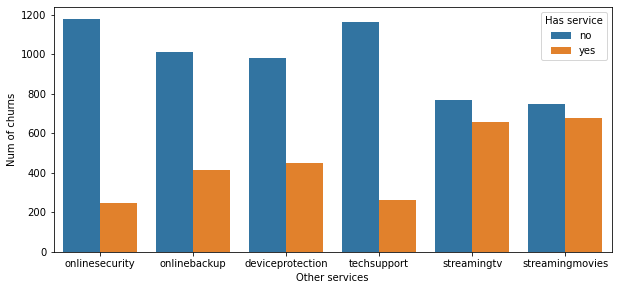

In [57]:
plt.figure(figsize=(10, 4.5))
df1 = df_train_full_explore[(df_train_full_explore.internetservice != "no") & (df_train_full_explore.churn == 1)]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['no', 'yes'])
ax.set(xlabel='Other services', ylabel='Num of churns')
plt.show()

- Streaming services are not indicative of churn
- Online security, online backup, device protection and tech support: Customers that opt for these 4 services are less likely to churn.

**Contract and Billing**

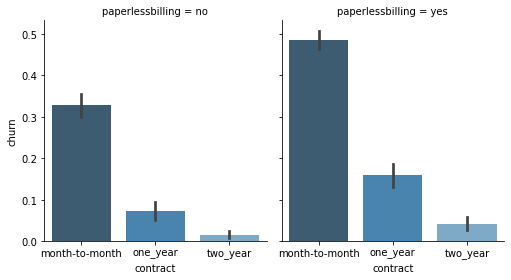

In [58]:
g = sns.FacetGrid(df_train_full_explore, col="paperlessbilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "contract", "churn", palette = "Blues_d", order= ['month-to-month', 'one_year', 'two_year'])

paymentmethod  churn  percentage of customers
0  bank_transfer_(automatic)      0                 0.179979
1  bank_transfer_(automatic)      1                 0.036386
2    credit_card_(automatic)      0                 0.180511
3    credit_card_(automatic)      1                 0.035499
4           electronic_check      0                 0.182819
5           electronic_check      1                 0.153177
6               mailed_check      0                 0.186723
7               mailed_check      1                 0.044906

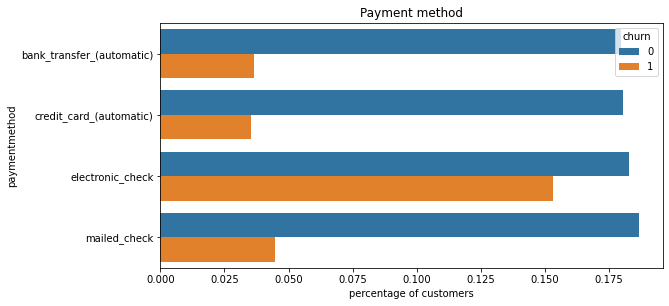

In [59]:
fig, axis = plt.subplots(1, 1, figsize=(9, 4.5))
axis.set_title("Payment method")
axis_y = "percentage of customers"
gp_paymentmethod = df_train_full_explore.groupby('paymentmethod')['churn'].value_counts()/len(df_train_full_explore)
gp_paymentmethod = gp_paymentmethod.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x= axis_y, y= 'paymentmethod' , hue= 'churn', data= gp_paymentmethod, ax= axis)
gp_paymentmethod

- Majority of customers use electronic check as a payment method. Large number of such customers churn as well
- Customers who opt for paperless billing churn more.
- Smaller contracts have higher churn rate.

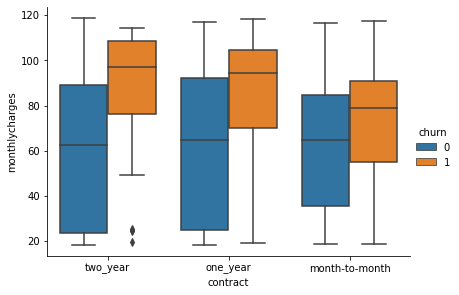

In [60]:
ax = sns.catplot(x="contract", y="monthlycharges", hue="churn", kind="box", data=df_train_full_explore, height=4.2, aspect=1.4)

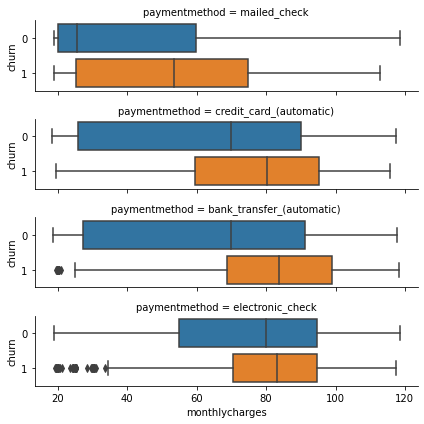

In [61]:
ax = sns.catplot(y="churn", 
                 x="monthlycharges", 
                 row="paymentmethod", 
                 kind="box", 
                 data=df_train_full_explore, 
                 height=1.5, 
                 aspect=4, 
                 orient='h')

- Mailed checks have lower charges
- When it comes to mailed check payment method, there is big difference in monthly charges for those who churn and those have not.

### Correlation between features

In [62]:
df_train_full_explore.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn',
       'tenure_label', 'monthlycharges_label', 'totalcharges_label'],
      dtype='object')

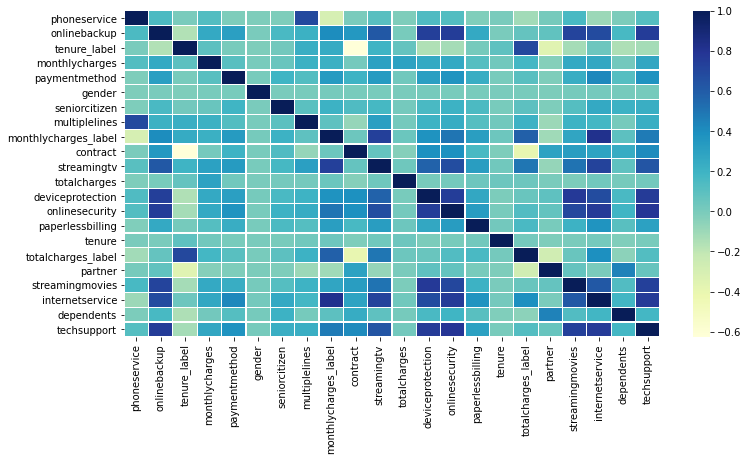

In [63]:
plt.figure(figsize=(12, 6))
corr_columns =  list(set(df_train_full_explore.columns) - set(['customerid', 'churn']))
corr = df_train_full_explore[corr_columns].apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [64]:
df_train_full_explore[numerical_features].corrwith(df_train_full_explore.churn).to_frame(name='Correlation with churn')

Correlation with churn
tenure                       -0.351885
monthlycharges                0.196805
totalcharges                 -0.196353

In [65]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full_explore.churn)

df_mi = df_train_full_explore[categorical_features].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False)
df_mi

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [66]:
df_mi.to_frame(name='MI')

MI
contract          0.098320
onlinesecurity    0.063085
techsupport       0.061032
internetservice   0.055868
onlinebackup      0.046923
deviceprotection  0.043453
paymentmethod     0.043210
streamingtv       0.031853
streamingmovies   0.031581
paperlessbilling  0.017589
dependents        0.012346
partner           0.009968
seniorcitizen     0.009410
multiplelines     0.000857
phoneservice      0.000229
gender            0.000117

In [67]:
# Pearson correlation coefficient
df_train_full_explore[numerical_features].corrwith(df_train_full_explore.churn).to_frame(name='correlation')

correlation
tenure            -0.351885
monthlycharges     0.196805
totalcharges      -0.196353

### Feature importance

We can get an idea of feature importance using Random forest classifier. Before we proceed with training Random Fores Classifier, we will have to do some feature engineering.

##### Feature Engineering

We will use `DictVectorizer` to convert raw categorical data into data that can be understood by ML algorithm. Earlier we will define a function called `get_X_Y`. This takes the input dataframe and other optional parameters like `scaling_required`. It converts categorical features into numerical using `DictVectorizer` and scales numerical features using `StandardScaler`. 

In [68]:
def get_X(df, categorical_features, numerical_features, scaling_required = True, is_training_data= True, dv = None):
    '''
    This function gets dataframe and converts input features into numpy 2D matrix
    and returns values that need to be predicted.
    Returns:
    {'X': X, 'dv' : dv}
    '''
    cat = df[categorical_features].to_dict(orient='rows')
    if is_training_data:
        dv = DictVectorizer(sparse=False)
        dv.fit(cat)
    X_categorical = dv.transform(cat)

    sc = StandardScaler()
    if scaling_required:
        sc.fit(df[numerical_features])
        X_numerical = sc.transform(df[numerical_features])
    else:
        X_numerical = df[numerical_features]

    X = np.concatenate((X_categorical, X_numerical), axis=1)
    
    return {'X' : X, 'dv' : dv}


In [69]:
res = get_X(df_train_full, categorical_features, numerical_features, scaling_required = False)
X_train_full_not_scaled = res['X']
dv = res['dv']

/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:1487: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


In [70]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_service',
 'streamingtv=y

In [71]:
numerical_features

['tenure', 'monthlycharges', 'totalcharges']

In [72]:
features_names = dv.feature_names_ + numerical_features
features_names

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_service',
 'streamingtv=y

In [73]:
params = {'random_state': 0, 'n_jobs': -1, 'n_estimators': 5000, 'max_depth': 8}
clf = RandomForestClassifier(**params)
clf = clf.fit(X_train_full_not_scaled, y_train_full)

In [74]:
# Prepare data for plotting feature importances
imp = pd.Series(
    data = clf.feature_importances_, 
    index=features_names).sort_values(ascending = False)
imp

tenure                                     0.145025
contract=month-to-month                    0.121321
totalcharges                               0.115754
monthlycharges                             0.071900
onlinesecurity=no                          0.058581
internetservice=fiber_optic                0.057406
techsupport=no                             0.051446
contract=two_year                          0.042379
paymentmethod=electronic_check             0.039916
internetservice=dsl                        0.024882
onlinebackup=no                            0.022224
contract=one_year                          0.018604
onlinesecurity=yes                         0.015704
techsupport=yes                            0.013549
deviceprotection=no                        0.013510
paperlessbilling=yes                       0.010355
paperlessbilling=no                        0.010070
onlinebackup=yes                           0.008113
seniorcitizen                              0.007869
streamingmov

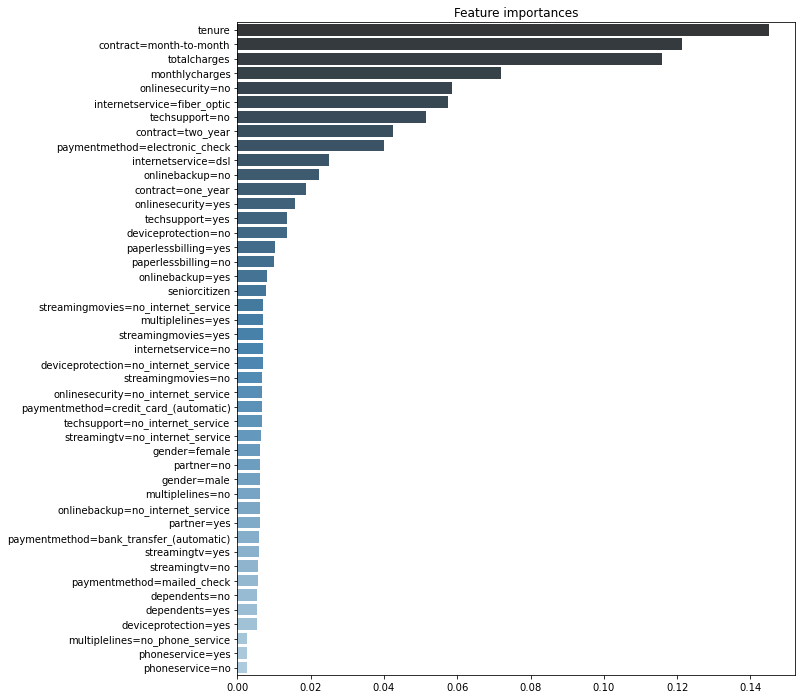

In [75]:
# Plot features importances
plt.figure(figsize=(10,12))
plt.title("Feature importances")
ax = sns.barplot(y = imp.index, x = imp.values, palette="Blues_d", orient='h')

**Observations**
- Numerical features are quite important.
- Month to month contract feature is very important categorical feature.
- Features related to phone service are not critical to understanding whether a customer would churn or not.

## Evaluation metrics
We have imbalanced dataset. However, imbalance is moderate. Approximately 26% of the data points represent customers that have churned. Using accuracy as a evaluation metric won't be wise thing to do for the problem at hand. Positive class in this problem is the user that is going to churn. These are the users who are going to leave the app. Our model will identify these users. 

1. False positive in this problem signifies that a user is predicted as churned but it is actually not. 
2. False negative in this problem signifies that a user is predicted as not churned but it is actually churned.

Precision takes into account #1 above. Recall takes into account #2. Lets make an assumption about the problem from business perspective: 

*We wish to ensure that we don't lag behind in identifying churned users. In the process of doing so, we are fine with identifying some users as churned but actually they are not (False positive).*

We care more about recall in this problem. Keeping above in mind, we will focus on F score as our evaluation metric. We will calculate F score at different `beta` values. Two beta values will be considered : 1 and 1.5. These are going to be our primary metrics. Besides, F-score, we will also calculate roc-auc, precision and recall.

In [76]:
evaluation_metrics = ['f1.5', 'f1', 'roc_auc', 'recall', 'precision', 'accuracy']

## User defined utility functions

In [77]:
def plot_confusion_matrix(y_actual, y_pred, class_labels, model_name):
    fig, axis = plt.subplots(1, 1, figsize=(8,5))
    matrix = confusion_matrix(y_actual, y_pred)
    axes = sns.heatmap(matrix, square= True, annot= True, fmt= 'd',
                       cbar= True, cmap= plt.cm.Blues, ax = axis)
    class_labels = class_labels
    
    axes.set_xlabel('Prediction')
    axes.set_ylabel('Actual')
    
    tick_marks = np.arange(len(class_labels)) + 0.5
    
    axes.set_xticks(tick_marks)
    axes.set_xticklabels(class_labels, rotation= 0)
    
    axes.set_yticks(tick_marks)
    axes.set_yticklabels(class_labels, rotation= 0)
    
    axes.set_title('Confusion Matrix of {}'.format(model_name))

In [78]:
def plot_roc_curve(fpr, tpr, model_name):
    fig, axis = plt.subplots(1, 1, figsize=(8,5))
#     fig = plt.figure(figsize= (8,5))
    fig.suptitle("AUC-ROC curve of {}".format(model_name))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

In [79]:
def plot_precision_vs_recall(precisions, recalls, model_name):
    fig = plt.figure(figsize= (8,5))
    fig.suptitle("PR curve of {}".format(model_name))
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

In [80]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, model_name):
    fig = plt.figure(figsize= (8,5))
    fig.suptitle("PR curve of {}".format(model_name))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
#     plt.axis([-5, 5, 0, 1])             # Not shown

In [81]:
def model_summary(model_name, model_obj, X_train_complete, y_train_complete, X_train, 
                  y_train, X_val, y_val, cv, feature_names, evaluation_metrics, metrics_collector_map, 
                  options = defaultdict(bool)):
        
    metrics_collector_map['model_name'].append(model_name)
    for metric in evaluation_metrics:
        if metric == 'f1.5':
            cross_validated_metrics_scores = cross_val_score(model_obj, X_train_complete, y_train_complete, cv= cv,
                                                        scoring= f_scorer)
        else:
            cross_validated_metrics_scores = cross_val_score(model_obj, X_train_complete, y_train_complete, cv= cv,
                                                        scoring= metric)
        cross_validated_metrics_score_mean  = np.mean(cross_validated_metrics_scores)
        metrics_collector_map[metric].append(cross_validated_metrics_score_mean)
    
    
    y_proba = cross_val_predict(model_obj, X_train_complete, y_train_complete, cv= cv, method="predict_proba")
    y_scores = y_proba[:, 1]
    y_pred = (y_scores > 0.5).astype(int)
    fpr_roc_auc, tpr_roc_auc, thresholds_roc_auc = roc_curve(y_train_complete, y_scores)
    
    # PR Curve
    precisions_pr_curve, recalls_pr_curve, pr_curve_thresholds = precision_recall_curve(y_train_complete, y_scores)
    plot_precision_vs_recall(precisions_pr_curve, recalls_pr_curve, model_name)
    plot_precision_recall_vs_threshold(precisions_pr_curve, recalls_pr_curve, pr_curve_thresholds, model_name)

    # ROC_AUC curve
    plot_roc_curve(fpr_roc_auc, tpr_roc_auc, model_name)
    
    # Classification report
    print(classification_report(y_train_complete, y_pred))
    
    # Confusion matrix
    plot_confusion_matrix(y_train_complete, y_pred, ['Not Churned', 'Churned'], model_name)
    
    # Analyze coefficients
    model_obj.fit(X_train, y_train)
    if options['feature_importance_available']:
        if options['coefficients']:
            model_coef = model_obj.coef_.ravel()
        else:
            model_coef = model_obj.feature_importances_
        feature_imp = pd.Series(data = model_coef, index= feature_names).sort_values(ascending = False)
        plt.figure(figsize=(10,12))
        plt.title("Feature importances for {}".format(model_name))
        ax = sns.barplot(y = feature_imp.index, x = feature_imp.values, palette="Blues_d", orient='h')

    #plot decision tree
    if options['tree_based']:
        tree_model = model_obj
        if model_name.startswith('RF'): tree_model = model_obj.estimators_[options['estimated_tree']]
        graph = Source(tree.export_graphviz(tree_model, out_file=None, rounded=True, proportion = False, 
                                            feature_names = feature_names, precision = 2,
                                            class_names = ["Not churn", "Churn"],
                                            filled = True                         
                                           )
                      )
        display(graph)

    # Evaluation metrics so far
    display(pd.DataFrame(metrics_collector_map))

In [82]:
def remove_last_entry(index):
    for k in metrics_collector_map.keys():
        metrics_collector_map[k].pop(index)
        print("key = {}, number of elements = {}".format(k, len(metrics_collector_map[k])))

In [83]:
def get_X_with_specific_features(X, required_features, all_features):
    indices = []
    for required_feature in required_features:
        indices.append(all_features.index(required_feature))
    return X[:, indices]

In [84]:
from sklearn.metrics import fbeta_score, make_scorer
f_scorer = make_scorer(fbeta_score, beta=1.5)

## Model Training

We will train multiple models. We will choose a diverse set of models and run a k fold cross validation sceheme to assess the pereformance of each model. We will cover following categories of models:
- Instance based model
    - KNN
- Tree based
    - Decision Tree
    - Random Forest
- Kernel based
    - SVM

Besides above, we are also going to train following models:
- Logistic regression
- Naive Bayes
- LDA

### Prepare data for model training

In [85]:
# Prepare input data for model training and collect all feature names
res = get_X(df_train_full, categorical_features, numerical_features)
X_train_full_scaled = res['X']
dv_full_scaled = res['dv']

all_features = dv_full_scaled.feature_names_ + numerical_features

res = get_X(df_train_full, categorical_features, numerical_features, scaling_required = False)
X_train_full_not_scaled = res['X']
dv_full_not_scaled = res['dv']

res = get_X(df_train, categorical_features, numerical_features)
X_train_scaled = res['X']
dv_scaled = res['dv']

res = get_X(df_train, categorical_features, numerical_features, scaling_required = False)
X_train_not_scaled = res['X']
dv_not_scaled = res['dv']

res = get_X(df_val, categorical_features, numerical_features, scaling_required = True, is_training_data= False, dv = dv_scaled)
X_val_scaled = res['X']

res = get_X(df_val, categorical_features, numerical_features, scaling_required = True, is_training_data= False, dv = dv_not_scaled)
X_val_not_scaled = res['X']

/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:1487: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:1487: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:1487: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,
/Users/shubhamshukla/opt/anaconda3/lib/pyth

### Phase I

#### Baseline Model

To understand whether our model actually good, we need to relate it to something — for example, a simple baseline that’s easy to understand. We have moderately imbalanced dataset. We have discussed earlier that F-beta (beta = 1.5) and F-score would be our primary evalution metrics. 

The naive strategy for the F-measure is to predict the minority class in all cases as making predictions that favor precision (e.g. predict the minority class) will also result in a lower bound on the recall.


In [86]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='constant', constant=1)
dummy_classifier.fit(X_train_scaled ,y_train)

DummyClassifier(constant=1, strategy='constant')

In [87]:
y_val_baseline_proba = dummy_classifier.predict_proba(X_val_scaled)
y_val_baseline_scores = y_val_baseline_proba[:, 1]
y_val_baseline_pred = (y_val_baseline_scores > 0.5).astype(int)

In [88]:
baseline_performance_on_training_data_map = defaultdict(list)
baseline_performance_on_training_data_map['model_name'] = ['Always Minority Class Baseline']
for metric in evaluation_metrics:
    if metric == 'f1.5':
        metric_value = fbeta_score(y_val, y_val_baseline_pred, beta=1.5)
    elif metric == 'f1':
        metric_value = f1_score(y_val, y_val_baseline_pred)
    elif metric == 'roc_auc':
        metric_value = roc_auc_score(y_val, y_val_baseline_scores)
    elif metric == 'recall':
        metric_value = recall_score(y_val, y_val_baseline_pred)
    elif metric == 'precision':
        metric_value = precision_score(y_val, y_val_baseline_pred)
    elif metric == 'accuracy':
        metric_value = accuracy_score(y_val, y_val_baseline_pred)
    baseline_performance_on_training_data_map[metric].append(metric_value)

pd.DataFrame(baseline_performance_on_training_data_map)    

model_name      f1.5        f1  roc_auc  recall  \
0  Always Minority Class Baseline  0.534789  0.414322      0.5     1.0   

   precision  accuracy  
0    0.26129   0.26129

In [89]:
baseline_performance_metrics_df = pd.DataFrame(baseline_performance_on_training_data_map)
baseline_performance_metrics_df

model_name      f1.5        f1  roc_auc  recall  \
0  Always Minority Class Baseline  0.534789  0.414322      0.5     1.0   

   precision  accuracy  
0    0.26129   0.26129

In [90]:
metrics_collector_map = defaultdict(list)

#### Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4113
           1       0.66      0.55      0.60      1521

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.74      5634
weighted avg       0.79      0.80      0.80      5634



model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454

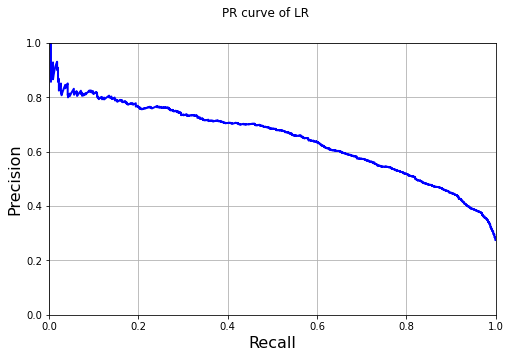

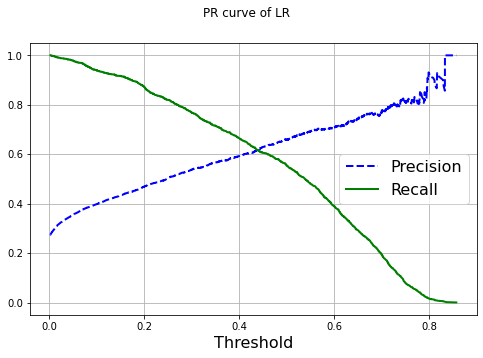

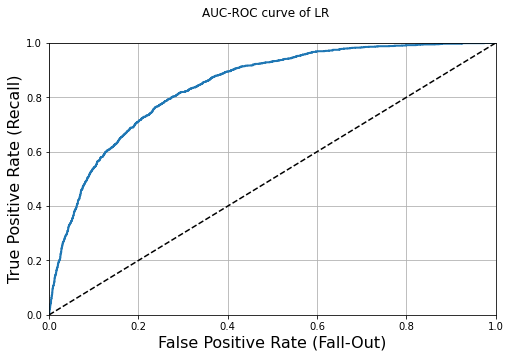

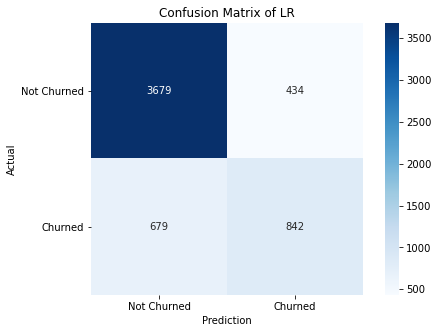

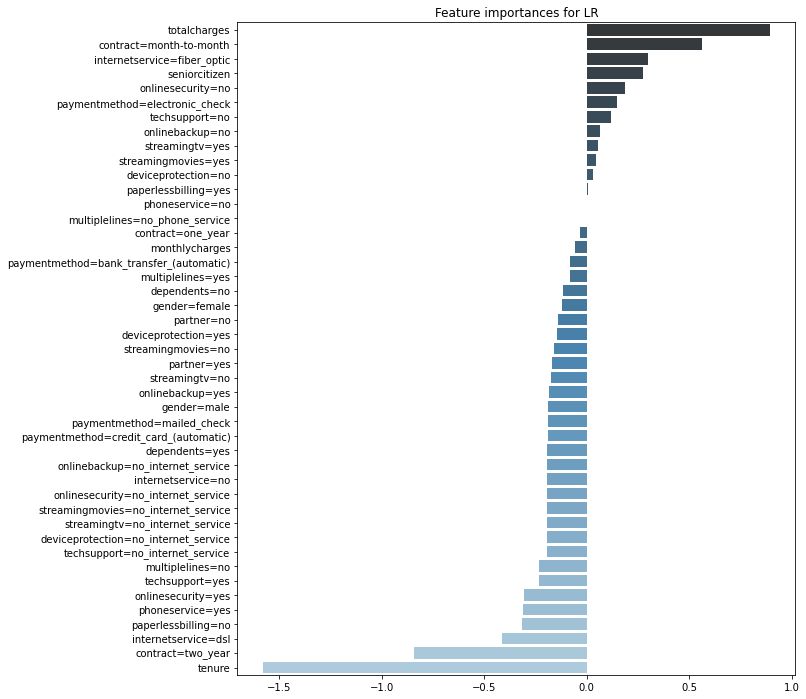

In [91]:
lr_model = LogisticRegression(solver='liblinear', random_state= 42)
lr_model_name = 'LR'
cv = 10
options = defaultdict(bool)
options['feature_importance_available'] =  True
options['coefficients'] = True

model_summary(lr_model_name, lr_model, X_train_full_scaled, y_train_full, X_train_scaled, 
                  y_train, X_val_scaled, y_val, cv, all_features, evaluation_metrics, metrics_collector_map, 
              options = options)


#### Decision Tree

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      4113
           1       0.68      0.39      0.50      1521

    accuracy                           0.79      5634
   macro avg       0.74      0.66      0.68      5634
weighted avg       0.77      0.79      0.77      5634



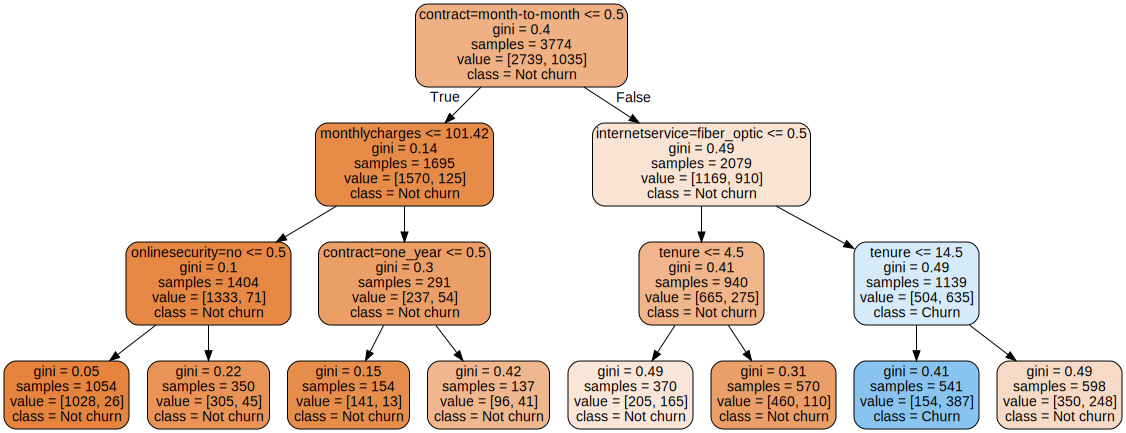

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120

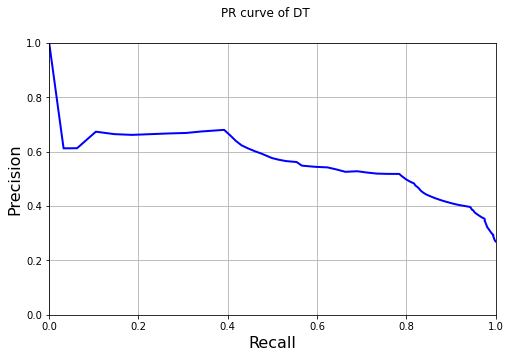

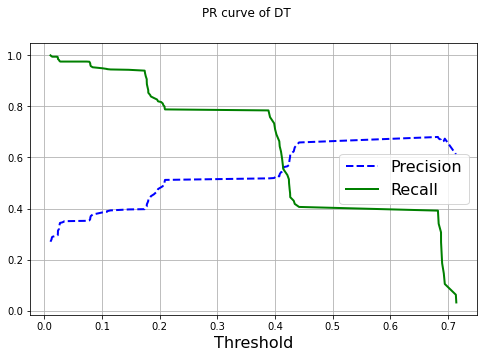

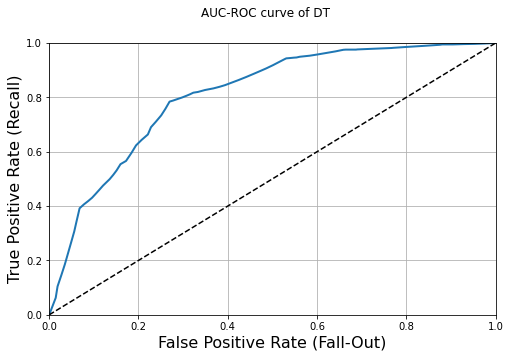

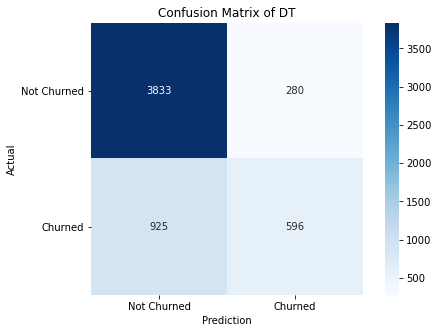

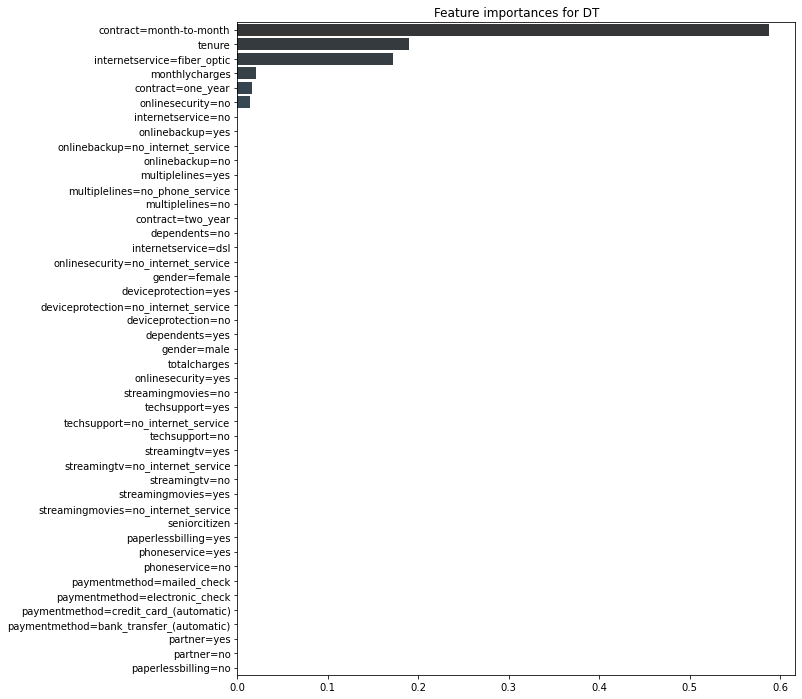

In [92]:
# DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

dt_classifier = DecisionTreeClassifier(random_state= 7, max_depth = 3)
dt_classifier_name = 'DT'
cv = 10
options = defaultdict(bool)
options['feature_importance_available'] =  True
options['tree_based'] = True

model_summary(dt_classifier_name, dt_classifier, X_train_full_not_scaled, y_train_full, X_train_not_scaled, 
                  y_train, X_val_not_scaled, y_val, cv, features_names, evaluation_metrics, metrics_collector_map,
              options = options)

#### Random Forest

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4113
           1       0.68      0.45      0.54      1521

    accuracy                           0.79      5634
   macro avg       0.75      0.68      0.70      5634
weighted avg       0.78      0.79      0.78      5634



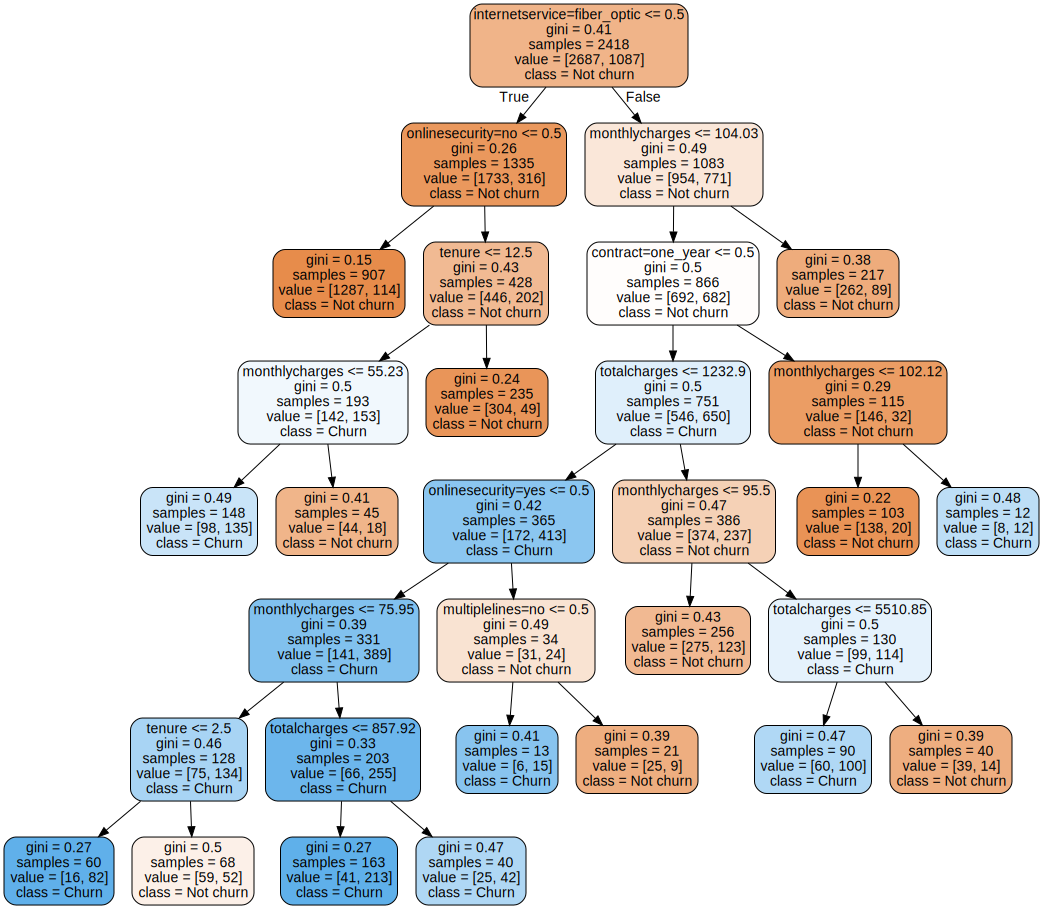

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930

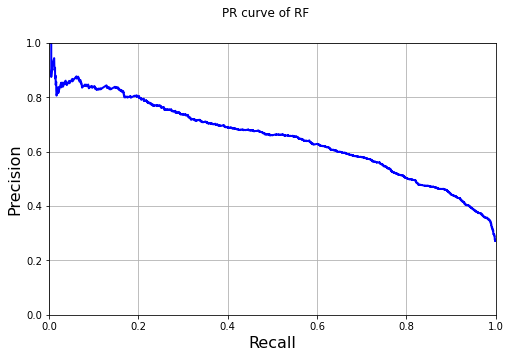

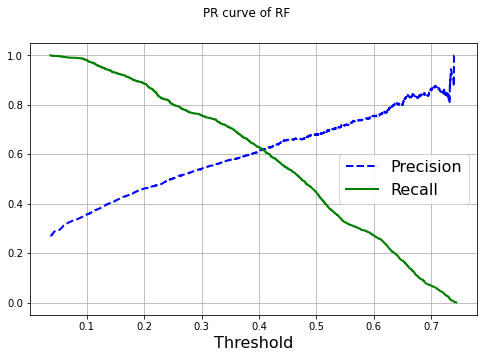

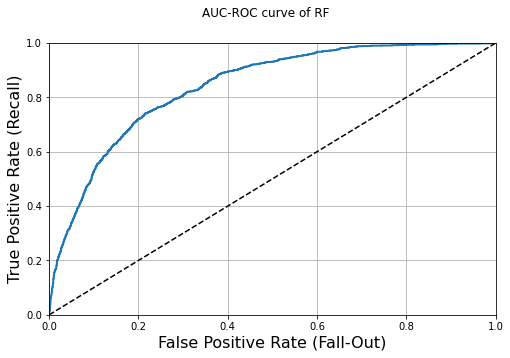

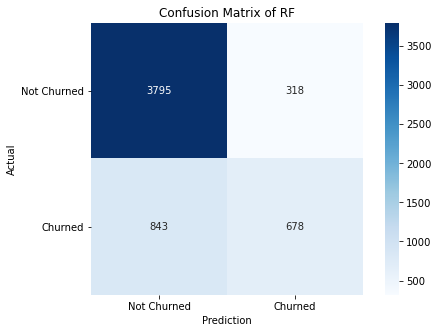

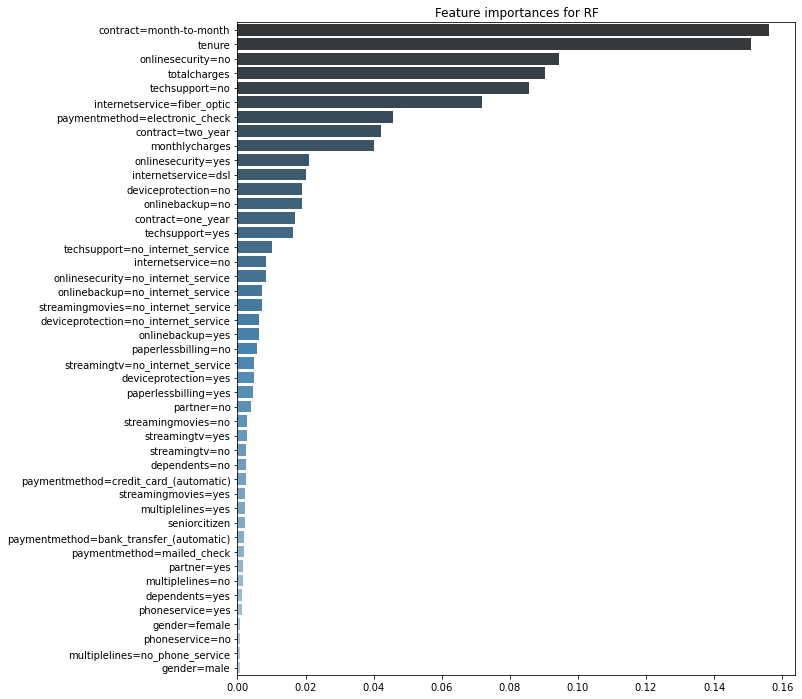

In [93]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, n_jobs=-1, random_state=7)
random_forest_model_name = 'RF'
cv = 10

options = defaultdict(bool)
options['feature_importance_available'] =  True
options['tree_based'] = True
options['estimated_tree'] = 190

model_summary(random_forest_model_name, random_forest_model, X_train_full_not_scaled, y_train_full, X_train_not_scaled, 
                  y_train, X_val_not_scaled, y_val, cv, features_names, evaluation_metrics, metrics_collector_map,
              options = options)

#### KNN

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4113
           1       0.57      0.53      0.55      1521

    accuracy                           0.77      5634
   macro avg       0.70      0.69      0.70      5634
weighted avg       0.76      0.77      0.76      5634



model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529

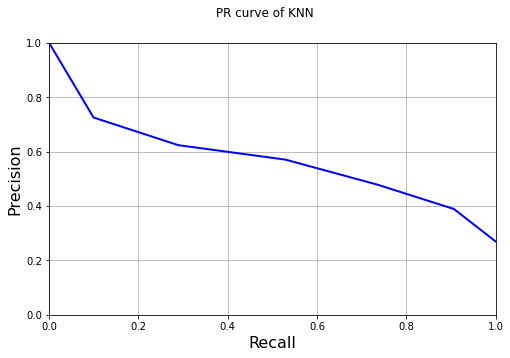

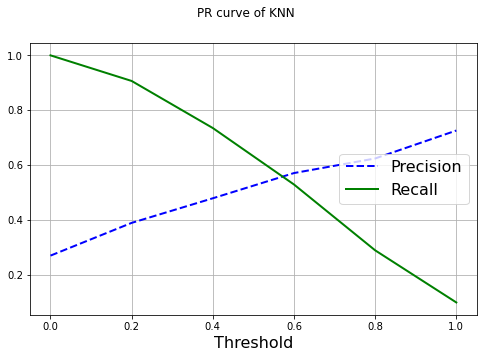

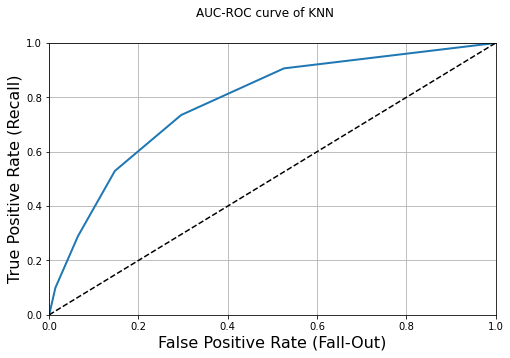

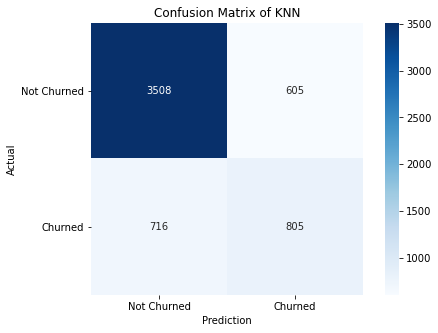

In [94]:
# KNN
knn_classifier = KNeighborsClassifier()
knn_classifier_model_name = 'KNN'
cv = 10
options = defaultdict(bool)

model_summary(knn_classifier_model_name, knn_classifier, X_train_full_scaled, 
              y_train_full, 
              X_train_scaled, 
              y_train, X_val_scaled, y_val, cv, features_names, evaluation_metrics, metrics_collector_map,
              options = options)


#### SVC Bagging

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4113
           1       0.67      0.48      0.56      1521

    accuracy                           0.80      5634
   macro avg       0.75      0.70      0.71      5634
weighted avg       0.78      0.80      0.78      5634



model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529
4      B_SVC  0.562550  0.592603  0.830953  0.543037   0.644247  0.799430

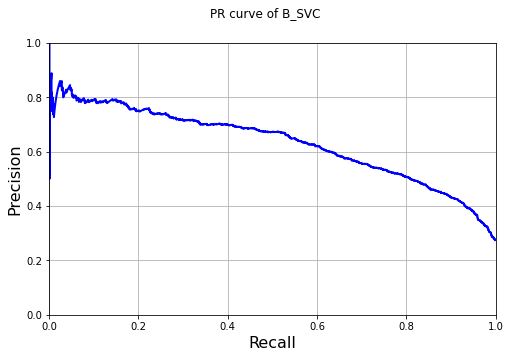

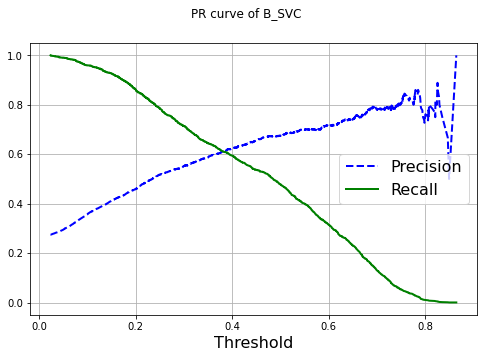

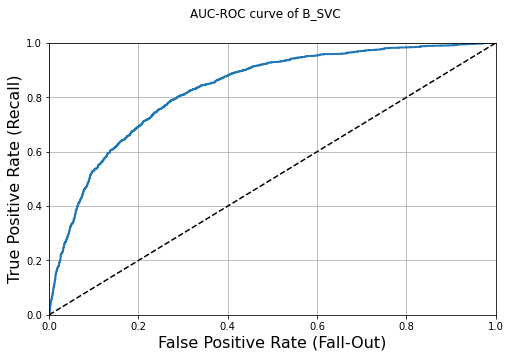

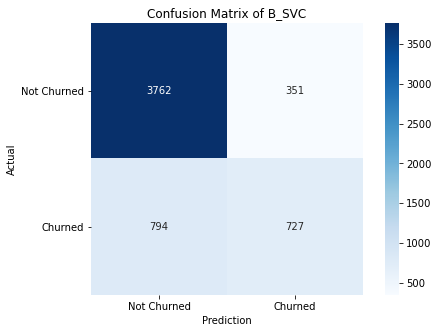

In [95]:
# SVC Bagging : https://stackoverflow.com/questions/31681373/making-svm-run-faster-in-python
"""
To speed up the training time with SVC,  we can use ensembles of SVCs that are trained on subsets of the data 
to reduce the number of records per classifier (which apparently has quadratic influence on complexity).
"""
n_estimators = 5
svc_bagging_model = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True, random_state= 7), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
svc_bagging_model_name = 'B_SVC'
cv = 5
options = defaultdict(bool)
model_summary(svc_bagging_model_name, svc_bagging_model, X_train_full_scaled, 
              y_train_full, 
              X_train_scaled, 
              y_train, X_val_scaled, y_val, cv, features_names, evaluation_metrics, metrics_collector_map,
              options = options)

#### Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.91      0.63      0.75      4113
           1       0.46      0.84      0.59      1521

    accuracy                           0.69      5634
   macro avg       0.69      0.74      0.67      5634
weighted avg       0.79      0.69      0.71      5634



model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529
4      B_SVC  0.562550  0.592603  0.830953  0.543037   0.644247  0.799430
5        GNB  0.667782  0.592313  0.813847  0.838949   0.457860  0.688140

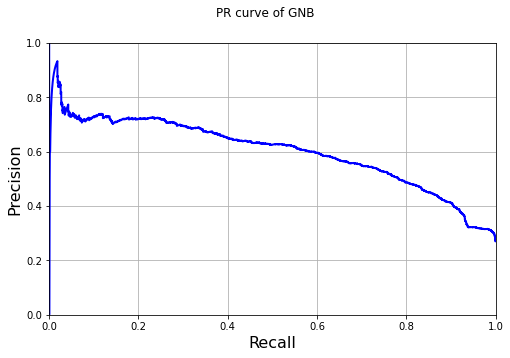

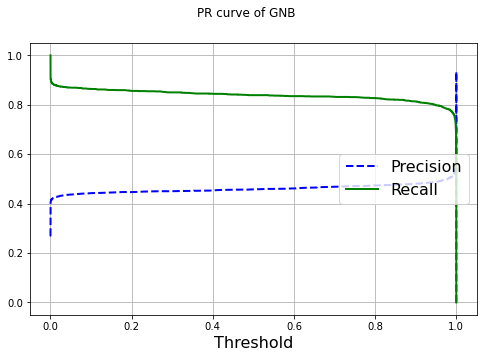

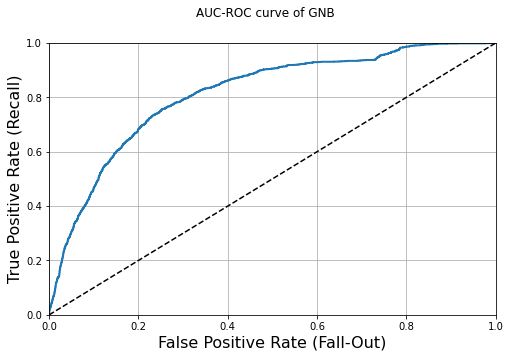

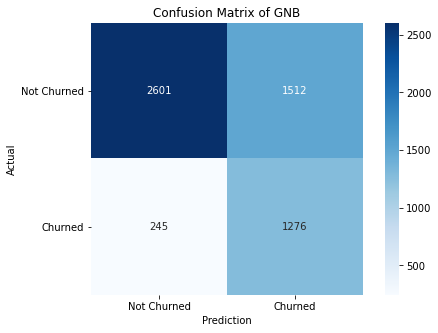

In [96]:
gnb_model = GaussianNB()
gnb_model_name = 'GNB'
cv = 10
options = defaultdict(bool)

model_summary(gnb_model_name, gnb_model, X_train_full_not_scaled, 
              y_train_full, 
              X_train_not_scaled, 
              y_train, X_val_not_scaled, y_val, cv, features_names, evaluation_metrics, metrics_collector_map,
              options = options)

#### Latent Dirichlet allocation

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4113
           1       0.64      0.55      0.59      1521

    accuracy                           0.79      5634
   macro avg       0.74      0.72      0.73      5634
weighted avg       0.79      0.79      0.79      5634



model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529
4      B_SVC  0.562550  0.592603  0.830953  0.543037   0.644247  0.799430
5        GNB  0.667782  0.592313  0.813847  0.838949   0.457860  0.688140
6        LDA  0.572806  0.589451  0.833326  0.548314   0.638680  0.793933

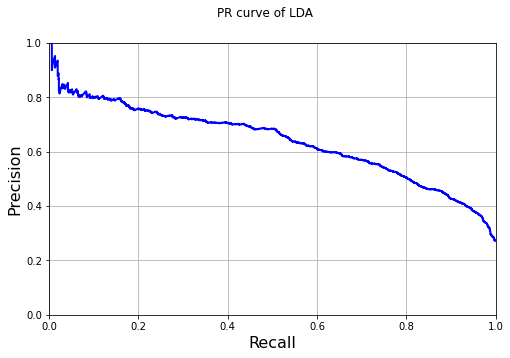

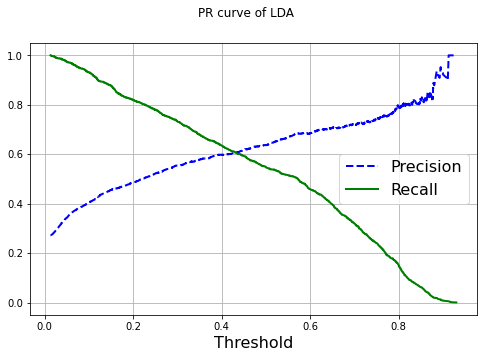

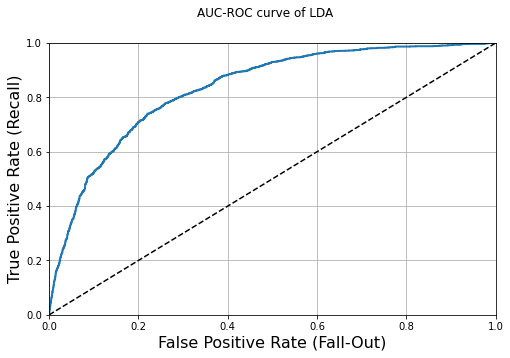

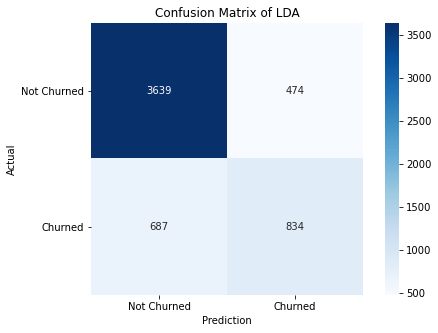

In [97]:
lda_model = LinearDiscriminantAnalysis()
lda_model_name = 'LDA'
cv = 10

options = defaultdict(bool)

model_summary(lda_model_name, lda_model, X_train_full_not_scaled, 
              y_train_full, 
              X_train_not_scaled, 
              y_train, X_val_not_scaled, y_val, cv, features_names, evaluation_metrics, metrics_collector_map,
              options = options)

#### Evaluation Metric Analysis

In [98]:
# Store all evaluation metrics in a dataframe
model_to_evaluation_metrics_df = pd.DataFrame(metrics_collector_map)

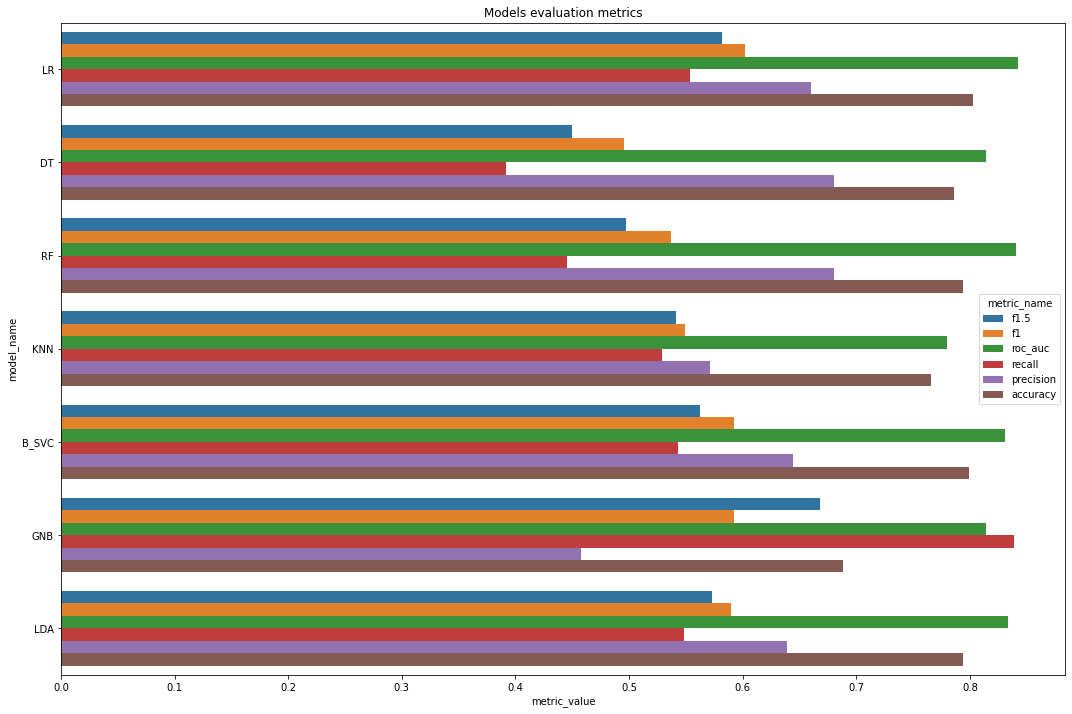

In [99]:
# Plotting all evaluation metrics and all models together
model_with_evaluation_metrics_names_and_values = {
    'model_name' : [],
    'metric_name' : [],
    'metric_value' : []
}

for row_hash in model_to_evaluation_metrics_df.to_dict(orient='records'):
    for metric in evaluation_metrics:
        model_with_evaluation_metrics_names_and_values['metric_name'].append(metric)
        model_with_evaluation_metrics_names_and_values['metric_value'].append(row_hash[metric])
        model_with_evaluation_metrics_names_and_values['model_name'].append(row_hash['model_name'])

model_with_evaluation_metrics_names_and_values_df = pd.DataFrame(model_with_evaluation_metrics_names_and_values)
fig, axis = plt.subplots(1, 1, figsize=(18,12))
axis.set_title("Models evaluation metrics")
axis_y = "metric_value"

ax = sns.barplot(x=axis_y, y='model_name' , hue='metric_name', 
                 data=model_with_evaluation_metrics_names_and_values_df, 
                 ax=axis)


In [100]:
# Sorting evaluation metrics by f1.5
model_to_evaluation_metrics_df_by_f1_point_5 = model_to_evaluation_metrics_df.sort_values(by=['f1.5'],ascending=False)
model_to_evaluation_metrics_df_by_f1_point_5

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
5        GNB  0.667782  0.592313  0.813847  0.838949   0.457860  0.688140
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
6        LDA  0.572806  0.589451  0.833326  0.548314   0.638680  0.793933
4      B_SVC  0.562550  0.592603  0.830953  0.543037   0.644247  0.799430
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120

In [101]:
# Sorting evaluation metrics by f1
model_to_evaluation_metrics_df_by_f1 = model_to_evaluation_metrics_df.sort_values(by=['f1'],ascending=False)
model_to_evaluation_metrics_df_by_f1

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
4      B_SVC  0.562550  0.592603  0.830953  0.543037   0.644247  0.799430
5        GNB  0.667782  0.592313  0.813847  0.838949   0.457860  0.688140
6        LDA  0.572806  0.589451  0.833326  0.548314   0.638680  0.793933
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120

In [102]:
# Sorting evaluation metrics by roc-auc
model_to_evaluation_metrics_df_by_roc_auc = model_to_evaluation_metrics_df.sort_values(by=['roc_auc'],ascending=False)
model_to_evaluation_metrics_df_by_roc_auc


model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
6        LDA  0.572806  0.589451  0.833326  0.548314   0.638680  0.793933
4      B_SVC  0.562550  0.592603  0.830953  0.543037   0.644247  0.799430
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120
5        GNB  0.667782  0.592313  0.813847  0.838949   0.457860  0.688140
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529

In [103]:
# Sorting evaluation metrics by precision
model_to_evaluation_metrics_df_by_precision = model_to_evaluation_metrics_df.sort_values(by=['precision'],ascending=False)
model_to_evaluation_metrics_df_by_precision

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
4      B_SVC  0.562550  0.592603  0.830953  0.543037   0.644247  0.799430
6        LDA  0.572806  0.589451  0.833326  0.548314   0.638680  0.793933
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529
5        GNB  0.667782  0.592313  0.813847  0.838949   0.457860  0.688140

In [104]:
# Sorting evaluation metrics by recall
model_to_evaluation_metrics_df_by_recall = model_to_evaluation_metrics_df.sort_values(by=['recall'],ascending=False)
model_to_evaluation_metrics_df_by_recall

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
5        GNB  0.667782  0.592313  0.813847  0.838949   0.457860  0.688140
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
6        LDA  0.572806  0.589451  0.833326  0.548314   0.638680  0.793933
4      B_SVC  0.562550  0.592603  0.830953  0.543037   0.644247  0.799430
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120

In [105]:
# Sorting evaluation metrics by accuracy
model_to_evaluation_metrics_df_by_accuracy = model_to_evaluation_metrics_df.sort_values(by=['accuracy'],ascending=False)
model_to_evaluation_metrics_df_by_accuracy

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
4      B_SVC  0.562550  0.592603  0.830953  0.543037   0.644247  0.799430
6        LDA  0.572806  0.589451  0.833326  0.548314   0.638680  0.793933
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529
5        GNB  0.667782  0.592313  0.813847  0.838949   0.457860  0.688140

In [106]:
import math
math.pow(2, 2)

4.0

In [107]:
evaluation_metrics

['f1.5', 'f1', 'roc_auc', 'recall', 'precision', 'accuracy']

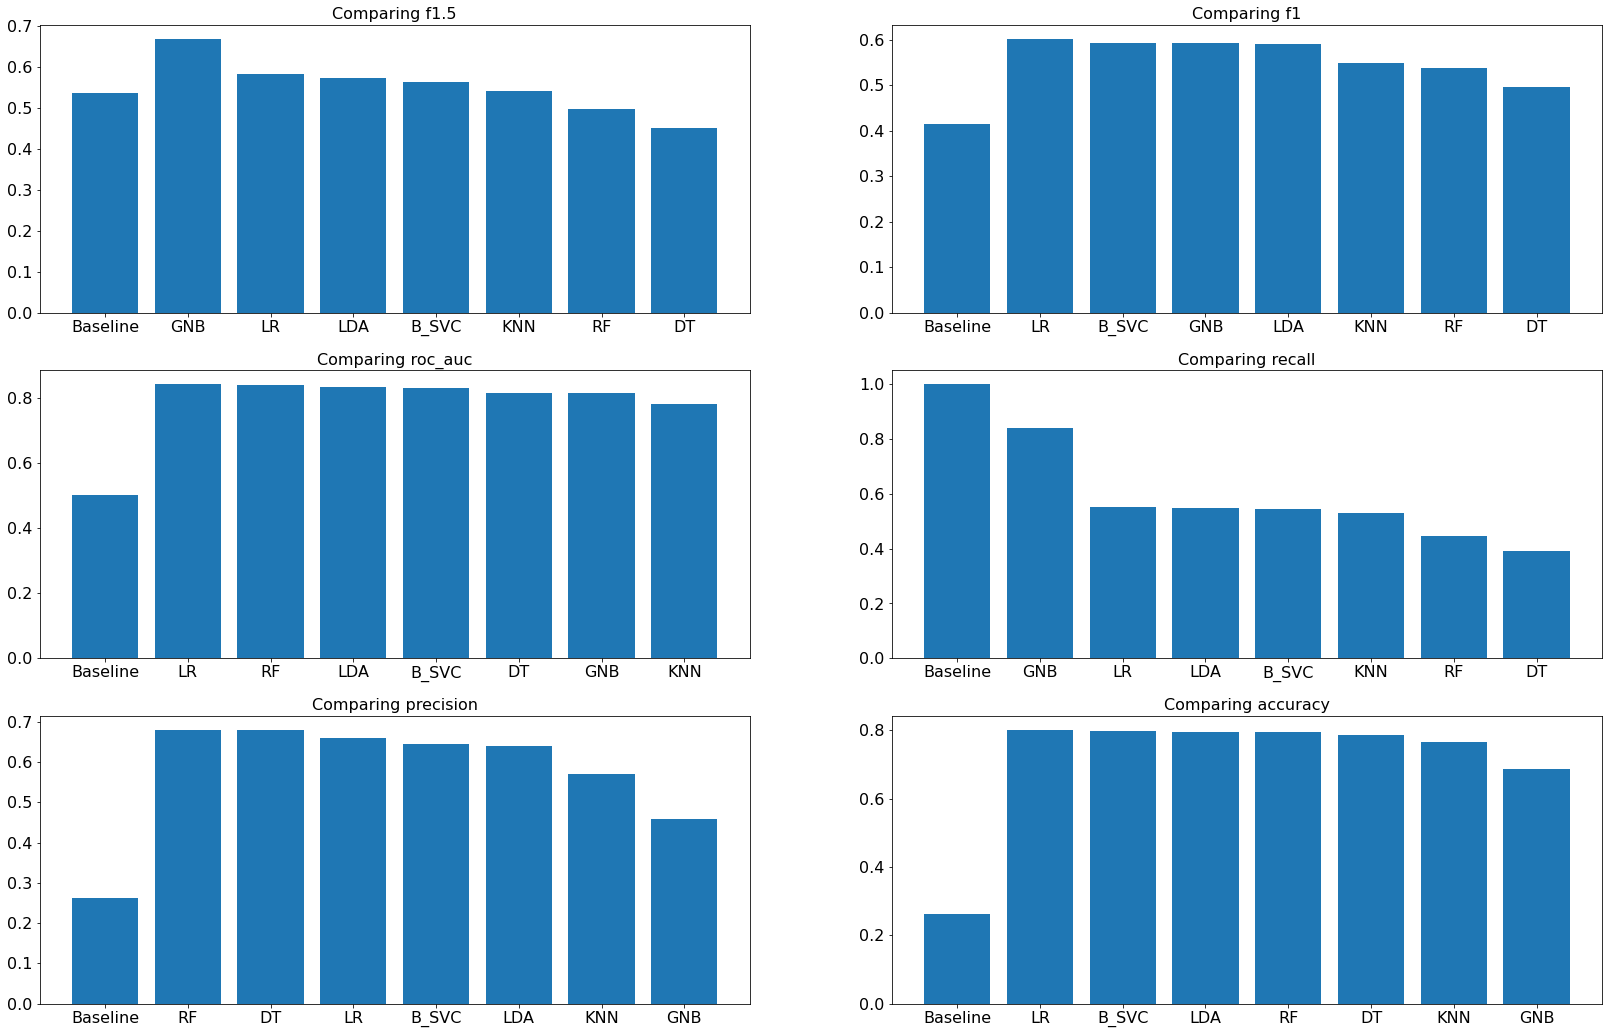

In [108]:
nrows = 3
ncols = 2
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(28,18))
for r in range(nrows):
    for c in range(ncols):
        subplot_ax = ax[r][c]
        if r == 0:
            index = c
        else:
            index = int(math.pow(2, r) + c)
        metric = evaluation_metrics[index]
        model_names = ['Baseline'] + list(model_to_evaluation_metrics_df.sort_values(by=[metric], ascending=False)['model_name'])
        metric_scores = list(baseline_performance_on_training_data_map[metric]) + list(model_to_evaluation_metrics_df.sort_values(by=[metric], ascending=False)[metric])
        subplot_ax.bar(model_names, metric_scores)
        subplot_ax.set_xticklabels(model_names, fontsize=16)
        subplot_ax.tick_params(axis="y", labelsize=16) 
        subplot_ax.set_title('Comparing {}'.format(metric), fontsize=16)

### Phase II

#### Synthetic Minority Oversampling Technique (SMOTE)

In [109]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from imblearn.over_sampling import SMOTE

def train_and_evaluate_model_with_smote(clone_clf, X_train_folds, y_train_folds, X_test_fold, y_test_fold,
                           model_to_evaluation_metrics_with_smote_map, model_name):
    
    if model_name not in model_to_evaluation_metrics_with_smote_map:
        model_to_evaluation_metrics_with_smote_map[model_name] = {metric : [] for metric in evaluation_metrics}
    
    sm = SMOTE(random_state= 7)
    
    X_train_fold_oversampled, y_train_fold_oversampled = sm.fit_sample(X_train_folds, y_train_folds)

    clone_clf.fit(X_train_fold_oversampled, y_train_fold_oversampled)

    y_proba_fold = clone_clf.predict_proba(X_test_fold)
    y_scores_fold = y_proba_fold[:, 1]
    y_pred_fold = (y_scores_fold > 0.5).astype(int)

    for metric in evaluation_metrics:
        if metric == 'f1.5':
            metric_value = fbeta_score(y_test_fold, y_pred_fold, beta=1.5)
        if metric == 'roc_auc':
            metric_value = roc_auc_score(y_test_fold, y_scores_fold)
        elif metric == 'f1':
            metric_value = f1_score(y_test_fold, y_pred_fold)
        elif metric == 'recall':
            metric_value = recall_score(y_test_fold, y_pred_fold)
        elif metric == 'precision':
            metric_value = precision_score(y_test_fold, y_pred_fold)
        elif metric == 'accuracy':
            metric_value = accuracy_score(y_test_fold, y_pred_fold)

        model_to_evaluation_metrics_with_smote_map[model_name][metric].append(metric_value)
    return y_pred_fold, y_scores_fold

def model_summary_with_smote(model_name, model_info_map, X_train_full_not_scaled, 
                             y_train, X_train_full_scaled, model_to_evaluation_metrics_with_smote_map, 
                             evaluation_metrics):

    model_obj = model_info_map['definition']
    options  = model_info_map['options']
    if options['scaling_required']:
        X_train = X_train_full_scaled
    else:
        X_train = X_train_full_not_scaled

    model_to_evaluation_metrics_with_smote_map[model_name] = {metric : [] for metric in evaluation_metrics}
    
    skfolds = StratifiedKFold(n_splits= options['kfold'], random_state=42)
    
    y_test_all_folds = np.array([])
    y_scores_all_folds = np.array([])
    y_pred_all_folds = np.array([])
    for train_index, test_index in skfolds.split(X_train, y_train):
        clone_clf = clone(model_obj)
        X_train_folds = X_train[train_index]
        y_train_folds = y_train[train_index]
        X_test_fold = X_train[test_index]
        y_test_fold = y_train[test_index]
        
        y_pred_fold, y_scores_fold = train_and_evaluate_model_with_smote(clone_clf, X_train_folds, y_train_folds, 
                                                                         X_test_fold, y_test_fold, 
                                                                         model_to_evaluation_metrics_with_smote_map, 
                                                          model_name)

        y_test_all_folds = np.concatenate([y_test_all_folds, y_test_fold])
        y_scores_all_folds = np.concatenate([y_scores_all_folds, y_scores_fold])
        y_pred_all_folds = np.concatenate([y_pred_all_folds, y_pred_fold])
    
    fpr_roc_auc, tpr_roc_auc, thresholds_roc_auc = roc_curve(y_test_all_folds, y_scores_all_folds)
    
    # PR Curve
    precisions_pr_curve, recalls_pr_curve, pr_curve_thresholds = precision_recall_curve(y_test_all_folds, y_scores_all_folds)
    plot_precision_vs_recall(precisions_pr_curve, recalls_pr_curve, model_name)
    plot_precision_recall_vs_threshold(precisions_pr_curve, recalls_pr_curve, pr_curve_thresholds, model_name)

    # ROC_AUC curve
    plot_roc_curve(fpr_roc_auc, tpr_roc_auc, model_name)
    
    # Classification report
    print(classification_report(y_test_all_folds, y_pred_all_folds))
    
    # Confusion matrix
    plot_confusion_matrix(y_test_all_folds, y_pred_all_folds, ['Not Churned', 'Churned'], model_name)

        

In [110]:
def get_smote_model_names_to_model_objects_map():
    smote_model_names_to_model_objects_map = {}
    smote_model_names_to_model_objects_map['LR']  = {
        'definition' : LogisticRegression(solver='liblinear', random_state= 42),
        'options' : {'scaling_required' : True, 'kfold' : 10}
    }

    smote_model_names_to_model_objects_map['DT']  = {
        'definition' : DecisionTreeClassifier(random_state= 7, max_depth = 3),
        'options' : {'scaling_required' : False, 'kfold' : 10}
    }

    smote_model_names_to_model_objects_map['RF']  = {
        'definition' : RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, n_jobs=-1, random_state=7),
        'options' : {'scaling_required' : False,  'kfold' : 10}
    }

    smote_model_names_to_model_objects_map['KNN']  = {
        'definition' : KNeighborsClassifier(),
        'options' : {'scaling_required' : True, 'kfold' : 10}
    }

    smote_model_names_to_model_objects_map['GNB']  = {
        'definition' : KNeighborsClassifier(),
        'options' : {'scaling_required' : False, 'kfold' : 10}
    }

    smote_model_names_to_model_objects_map['LDA']  = {
        'definition' : LinearDiscriminantAnalysis(),
        'options' : {'scaling_required' : False, 'kfold' : 10}
    }
    return smote_model_names_to_model_objects_map

In [111]:
smote_model_names_to_model_objects_map = get_smote_model_names_to_model_objects_map()

In [112]:
def get_model_to_evaluation_metrics_with_smote_map(smote_model_names_to_model_objects_map):
    model_to_evaluation_metrics_with_smote_map = {}
    for model_name, model_info_map in smote_model_names_to_model_objects_map.items():
        print("Training : {}".format(model_name))
        model_summary_with_smote(model_name, model_info_map, X_train_full_scaled, 
                                 y_train_full, X_train_full_not_scaled, 
                                 model_to_evaluation_metrics_with_smote_map, evaluation_metrics)
    return model_to_evaluation_metrics_with_smote_map

Training : LR


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      4113
         1.0       0.52      0.80      0.63      1521

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634

Training : DT


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80      4113
         1.0       0.50      0.73      0.59      1521

    accuracy                           0.73      5634
   macro avg       0.69      0.73      0.69      5634
weighted avg       0.78      0.73      0.74      5634

Training : RF


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83      4113
         1.0       0.54      0.74      0.63      1521

    accuracy                           0.76      5634
   macro avg       0.72      0.76      0.73      5634
weighted avg       0.80      0.76      0.77      5634

Training : KNN


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78      4113
         1.0       0.46      0.67      0.55      1521

    accuracy                           0.70      5634
   macro avg       0.66      0.69      0.66      5634
weighted avg       0.75      0.70      0.72      5634

Training : GNB


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.87      0.69      0.77      4113
         1.0       0.46      0.73      0.57      1521

    accuracy                           0.70      5634
   macro avg       0.67      0.71      0.67      5634
weighted avg       0.76      0.70      0.72      5634

Training : LDA


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      4113
         1.0       0.51      0.79      0.62      1521

    accuracy                           0.74      5634
   macro avg       0.71      0.76      0.71      5634
weighted avg       0.80      0.74      0.75      5634



/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

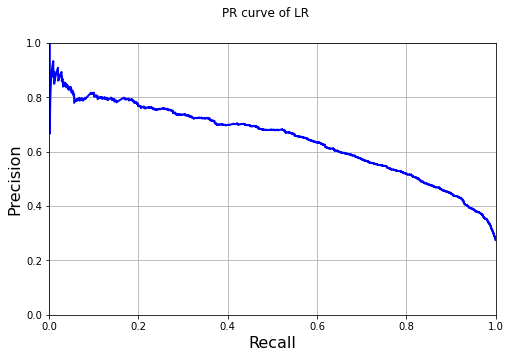

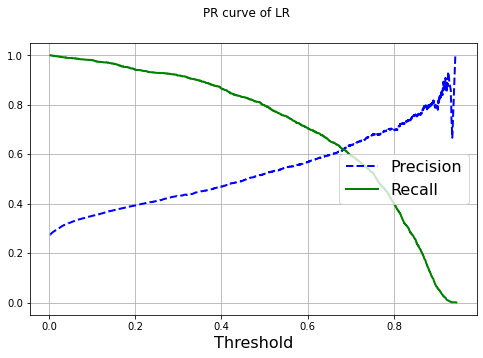

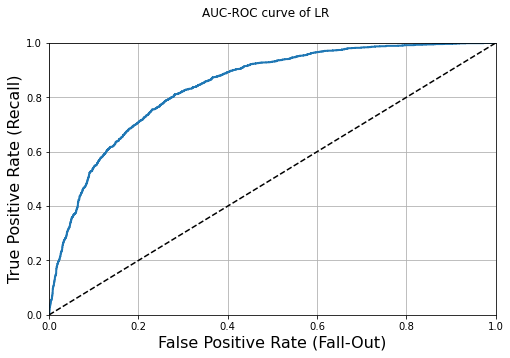

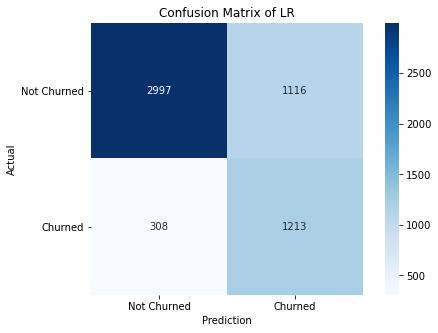

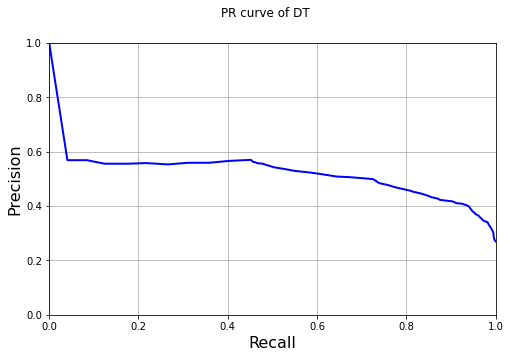

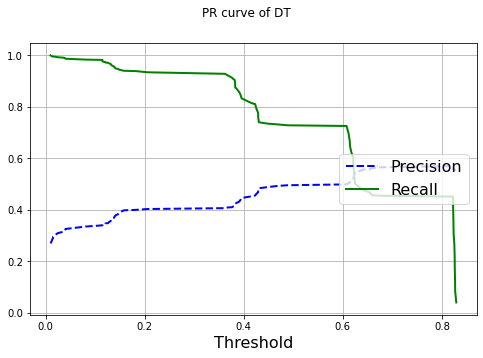

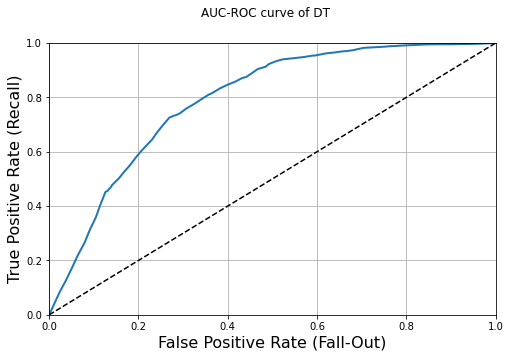

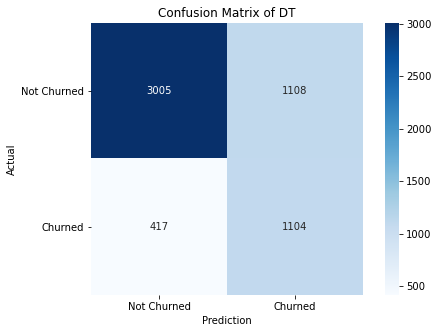

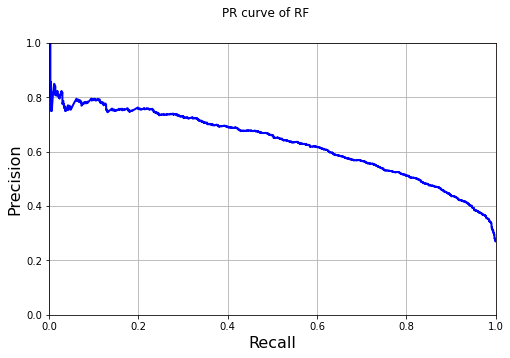

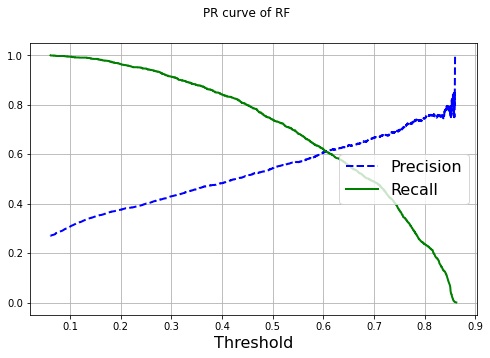

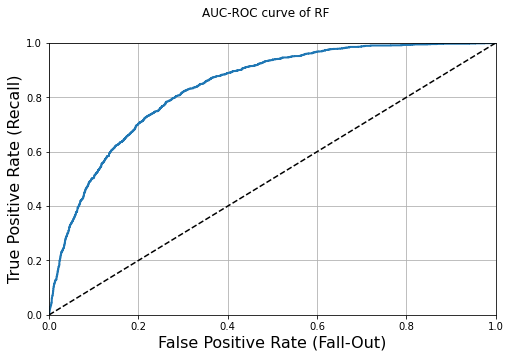

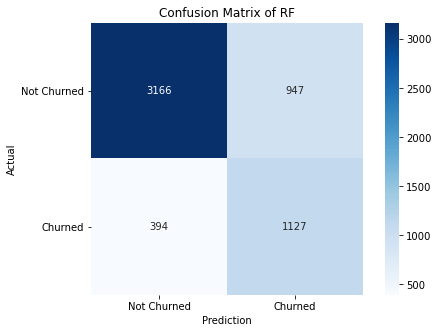

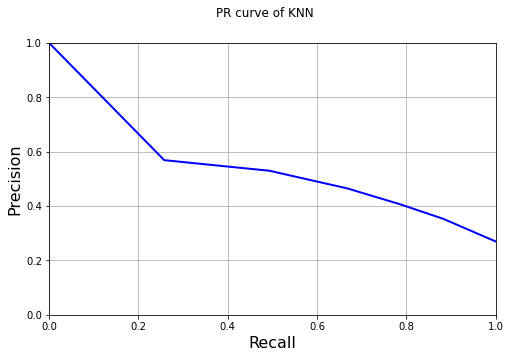

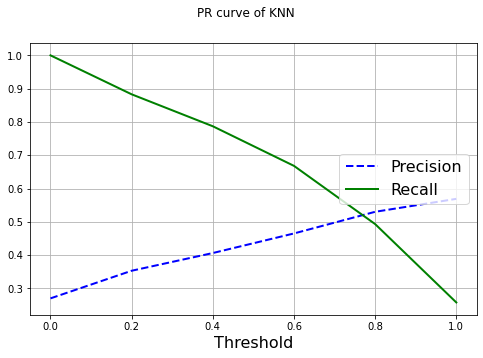

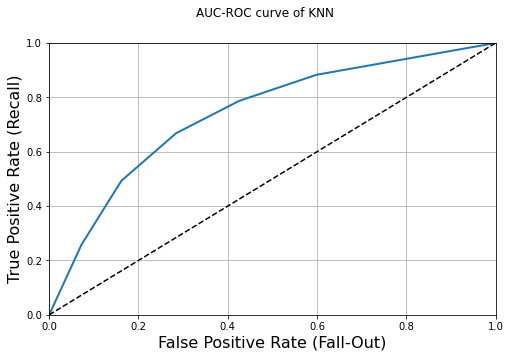

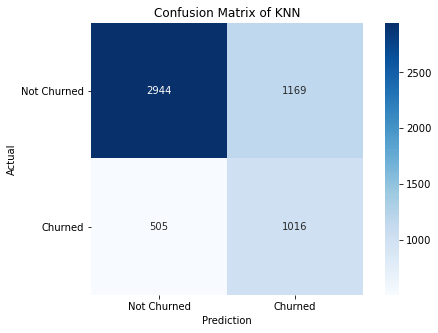

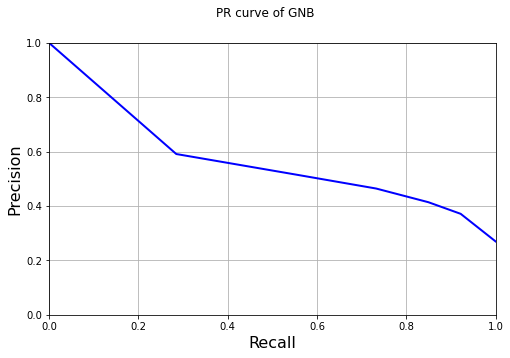

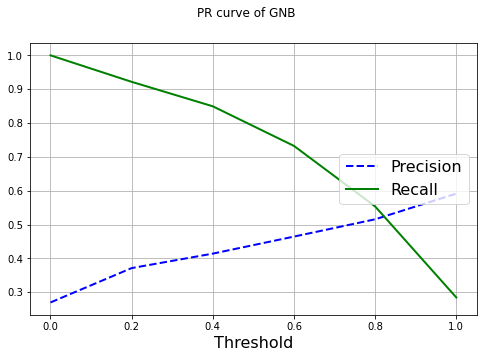

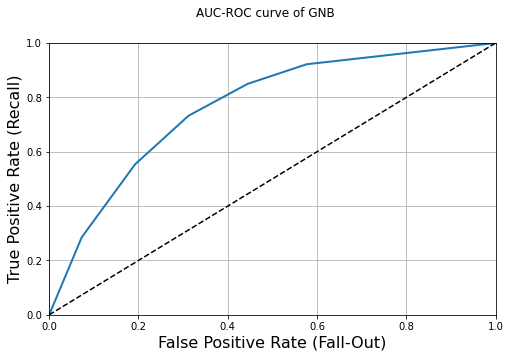

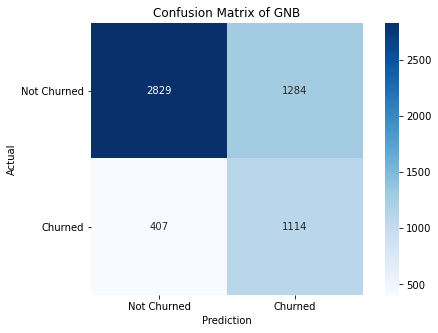

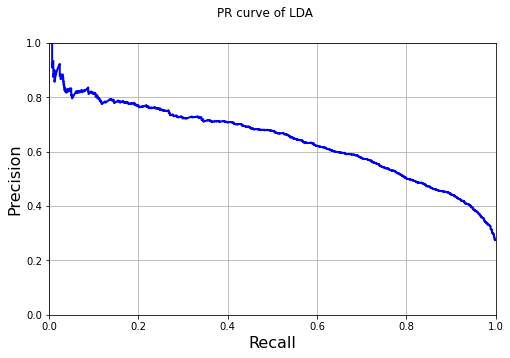

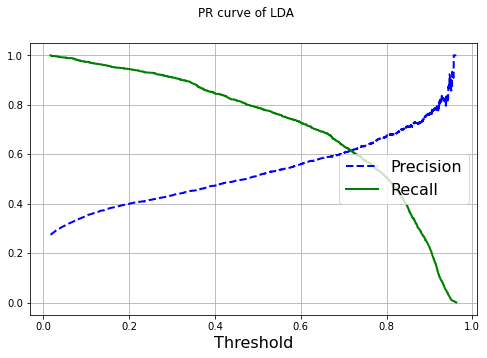

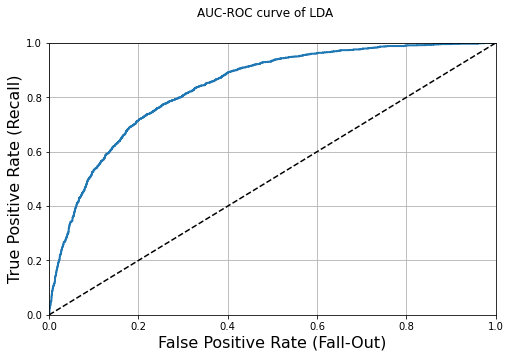

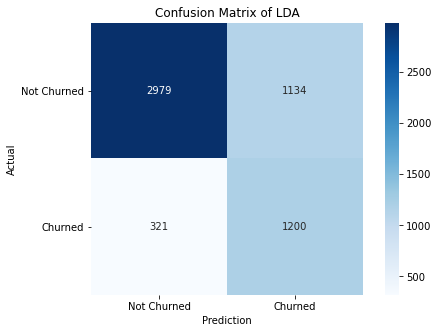

In [113]:
model_to_evaluation_metrics_with_smote_map = get_model_to_evaluation_metrics_with_smote_map(
    smote_model_names_to_model_objects_map
)

In [114]:
# Separately training for SVC
smote_model_names_to_model_objects_map['B_SVC']  = {
    'definition' : OneVsRestClassifier(
    BaggingClassifier(
        SVC(kernel='linear', probability=True, random_state= 7), 
                      max_samples=1.0 / 5, 
                      n_estimators=5)
),
    'options' : {'scaling_required' : True, 'kfold' : 5}
}
_, _ = train_and_evaluate_model_with_smote(smote_model_names_to_model_objects_map['B_SVC']['definition'], 
                                    X_train_scaled, y_train, X_val_scaled, y_val,
                           model_to_evaluation_metrics_with_smote_map, 'B_SVC')

In [115]:
def get_model_to_mean_evaluation_metrics_with_smote_df(model_to_evaluation_metrics_with_smote_map):
    model_to_mean_evaluation_metrics_with_smote_map = defaultdict(list)
    for model_name, metrics_map in model_to_evaluation_metrics_with_smote_map.items():
        model_to_mean_evaluation_metrics_with_smote_map['model_name'].append(model_name)
        for metric_name in evaluation_metrics:
            value = np.mean(metrics_map[metric_name])
            model_to_mean_evaluation_metrics_with_smote_map[metric_name].append(value)
    return pd.DataFrame(model_to_mean_evaluation_metrics_with_smote_map)

In [116]:
model_to_mean_evaluation_metrics_with_smote_df = get_model_to_mean_evaluation_metrics_with_smote_df(
    model_to_evaluation_metrics_with_smote_map)

In [117]:
model_to_mean_evaluation_metrics_with_smote_df

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.685354  0.630107  0.841196  0.797519   0.521142  0.747247
1         DT  0.636844  0.591624  0.791567  0.725860   0.499632  0.729318
2         RF  0.666404  0.627118  0.837751  0.740987   0.544078  0.761982
3        KNN  0.588759  0.548260  0.739152  0.667982   0.465316  0.702872
4        GNB  0.622011  0.568577  0.766290  0.732405   0.464943  0.699860
5        LDA  0.677498  0.622697  0.838220  0.788966   0.514777  0.741742
6      B_SVC  0.666219  0.608280  0.832692  0.786008   0.496104  0.735484

Lets compare models performance with oversampling of minority class and without oversampling.

In [118]:
model_to_evaluation_metrics_type_and_value_df = model_to_evaluation_metrics_df.melt(id_vars = "model_name", var_name = "metric_type", value_name = "metric_value")
model_to_evaluation_metrics_type_and_value_df['smote'] = 0

model_to_mean_evaluation_metrics_type_and_value_with_smote_df = model_to_mean_evaluation_metrics_with_smote_df.melt(id_vars = "model_name", var_name = "metric_type", value_name = "metric_value")
model_to_mean_evaluation_metrics_type_and_value_with_smote_df['smote'] = 1

In [119]:
model_to_mean_evaluation_metrics_type_and_value_with_smote_df.head()

model_name metric_type  metric_value  smote
0         LR        f1.5      0.685354      1
1         DT        f1.5      0.636844      1
2         RF        f1.5      0.666404      1
3        KNN        f1.5      0.588759      1
4        GNB        f1.5      0.622011      1

In [120]:
model_with_evaluation_metrics_with_smote_and_no_smote_df = model_to_evaluation_metrics_type_and_value_df.append(
    model_to_mean_evaluation_metrics_type_and_value_with_smote_df)
model_with_evaluation_metrics_with_smote_and_no_smote_df

model_name metric_type  metric_value  smote
0          LR        f1.5      0.582117      0
1          DT        f1.5      0.449512      0
2          RF        f1.5      0.497648      0
3         KNN        f1.5      0.541260      0
4       B_SVC        f1.5      0.562550      0
..        ...         ...           ...    ...
37         RF    accuracy      0.761982      1
38        KNN    accuracy      0.702872      1
39        GNB    accuracy      0.699860      1
40        LDA    accuracy      0.741742      1
41      B_SVC    accuracy      0.735484      1

[84 rows x 4 columns]

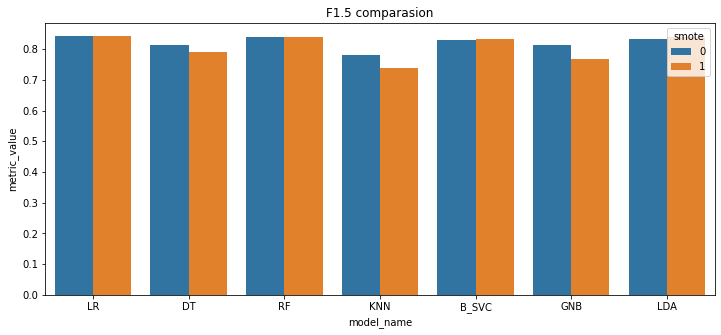

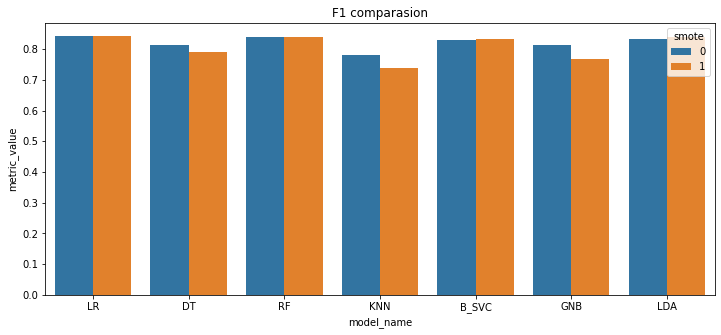

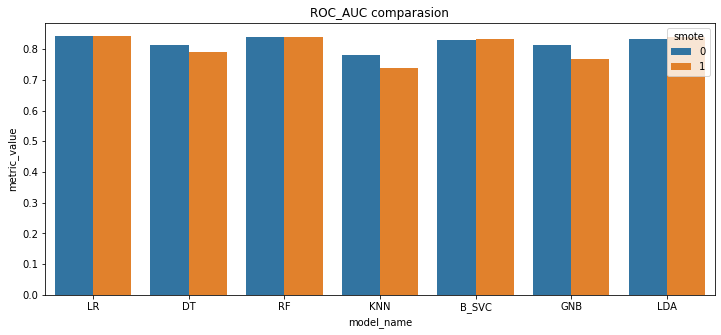

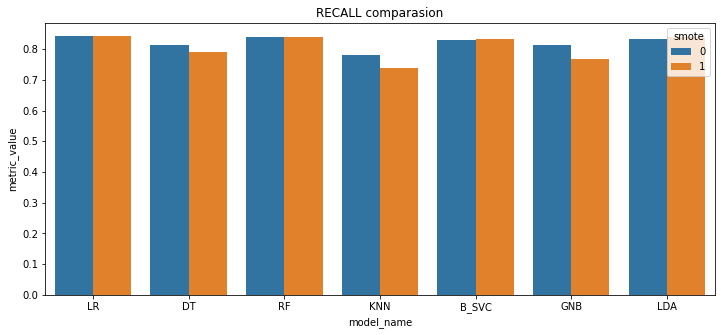

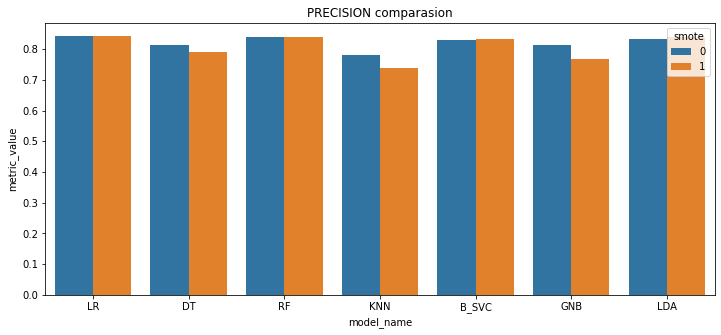

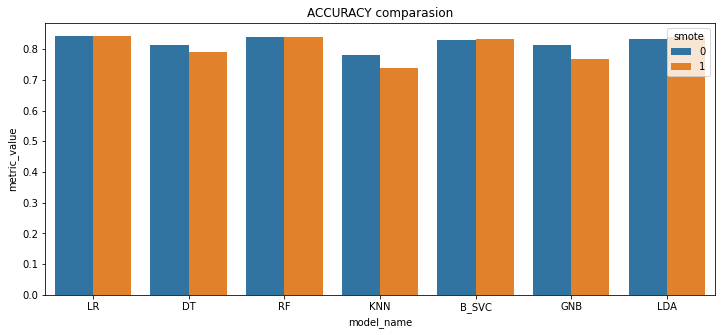

In [121]:
for metric_name in evaluation_metrics:
    fig, axis = plt.subplots(1, 1, figsize=(12,5))
    axis.set_title("{} comparasion".format(metric_name.upper()))
    ax = sns.barplot(x = 'model_name', 
                     y = 'metric_value', 
                     hue='smote', 
                     data = model_with_evaluation_metrics_with_smote_and_no_smote_df[model_with_evaluation_metrics_with_smote_and_no_smote_df['metric_type'] == 'roc_auc'], 
                     ax = axis)

We can see from the graphs aboves that SMOTE has not helped in improving the performance of models. We would now like to try out some feature selection techniques and assess the performance of models.

### Phase III

#### Recursive feature elimination

In [122]:
from sklearn.feature_selection import RFE

lr = LogisticRegression(solver='liblinear', random_state= 42, max_iter=1000)

rfe = RFE(lr ,n_features_to_select= 17)

sm = SMOTE(random_state= 7)    

X_train_scaled_oversampled, y_train_oversampled = sm.fit_sample(X_train_scaled, y_train)

rfe = rfe.fit(X_train_scaled_oversampled, y_train_oversampled)


In [123]:
rfe_feature_df = pd.DataFrame({
    'feature_names' : all_features,
    'rfe_support' : rfe.support_,
    'rfe_ranking' : rfe.ranking_
})
rfe_feature_df.head()

feature_names  rfe_support  rfe_ranking
0  contract=month-to-month         True            1
1        contract=one_year        False           24
2        contract=two_year         True            1
3            dependents=no        False           25
4           dependents=yes        False            7

In [124]:
X_train_full_scaled_rfe = X_train_full_scaled[:, rfe.support_]
X_train_scaled_rfe = X_train_scaled[:, rfe.support_]
X_val_scaled_rfe = X_val_scaled[:, rfe.support_]

In [125]:
all_features_rfe = list(rfe_feature_df[rfe_feature_df['rfe_support'] == True]['feature_names'])
all_features_rfe

['contract=month-to-month',
 'contract=two_year',
 'deviceprotection=no_internet_service',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'onlinebackup=no_internet_service',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingtv=no_internet_service',
 'streamingtv=yes',
 'tenure',
 'monthlycharges',
 'totalcharges']

In [126]:
feature_selection_metrics_collector_map = defaultdict(list)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4113
           1       0.65      0.54      0.59      1521

    accuracy                           0.80      5634
   macro avg       0.75      0.72      0.73      5634
weighted avg       0.79      0.80      0.79      5634



model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0     LR_RFE  0.567494  0.589023  0.840159  0.536468   0.654824  0.798192

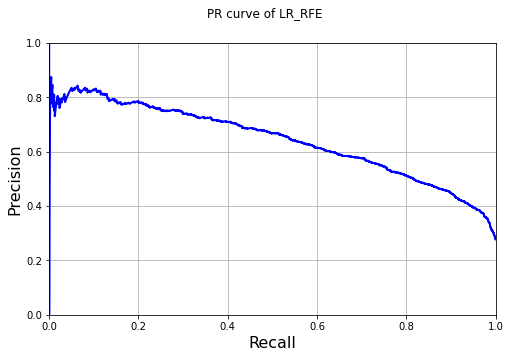

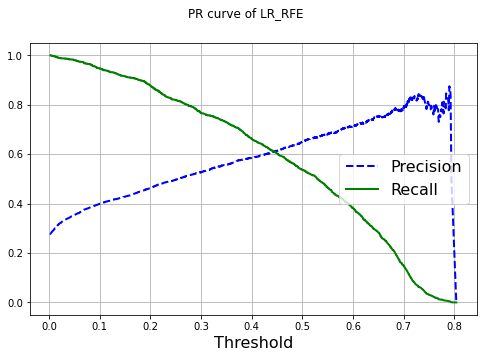

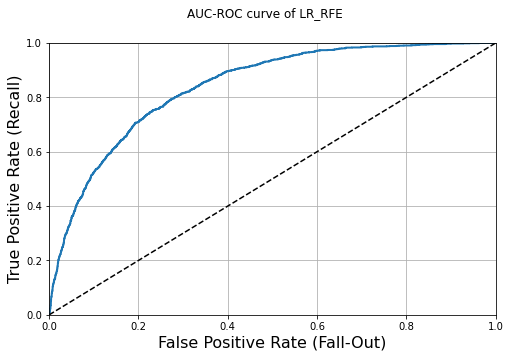

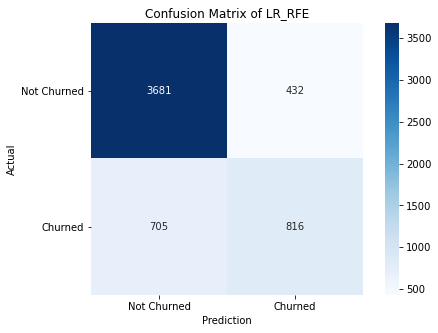

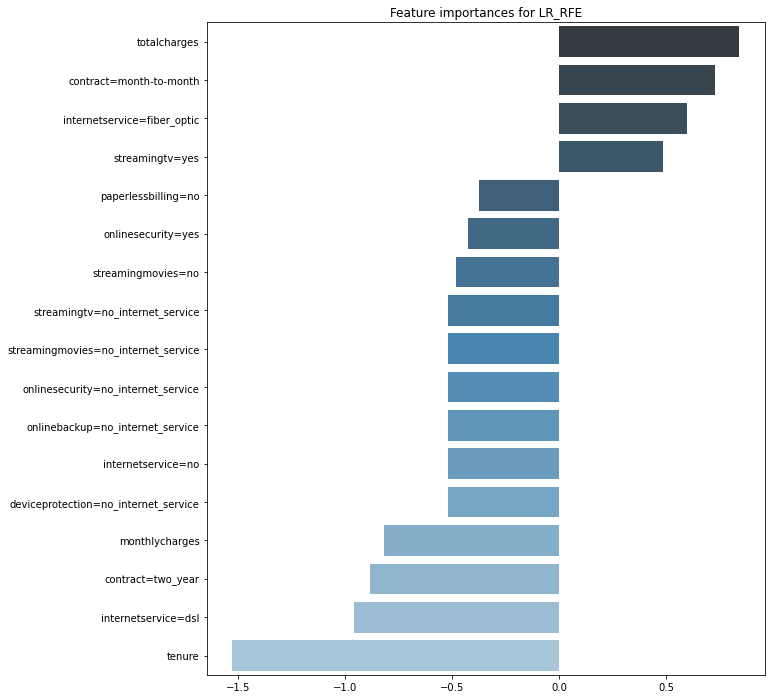

In [127]:
lr_rfe_model = LogisticRegression(solver='liblinear', random_state= 42)
lr_rfe_model_name = 'LR_RFE'
cv = 10
options = defaultdict(bool)
options['feature_importance_available'] =  True
options['coefficients'] = True

model_summary(lr_rfe_model_name, lr_rfe_model, X_train_full_scaled_rfe, y_train_full, X_train_scaled_rfe, 
                  y_train, X_val_scaled_rfe, y_val, cv, all_features_rfe, evaluation_metrics, 
              feature_selection_metrics_collector_map, options = options)

In [128]:
X_train_full_not_scaled_rfe = X_train_full_not_scaled[:, rfe.support_]
X_train_not_scaled_rfe = X_train_not_scaled[:, rfe.support_]
X_val_not_scaled_rfe = X_val_not_scaled[:, rfe.support_]

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4113
           1       0.67      0.46      0.54      1521

    accuracy                           0.79      5634
   macro avg       0.74      0.69      0.70      5634
weighted avg       0.78      0.79      0.78      5634



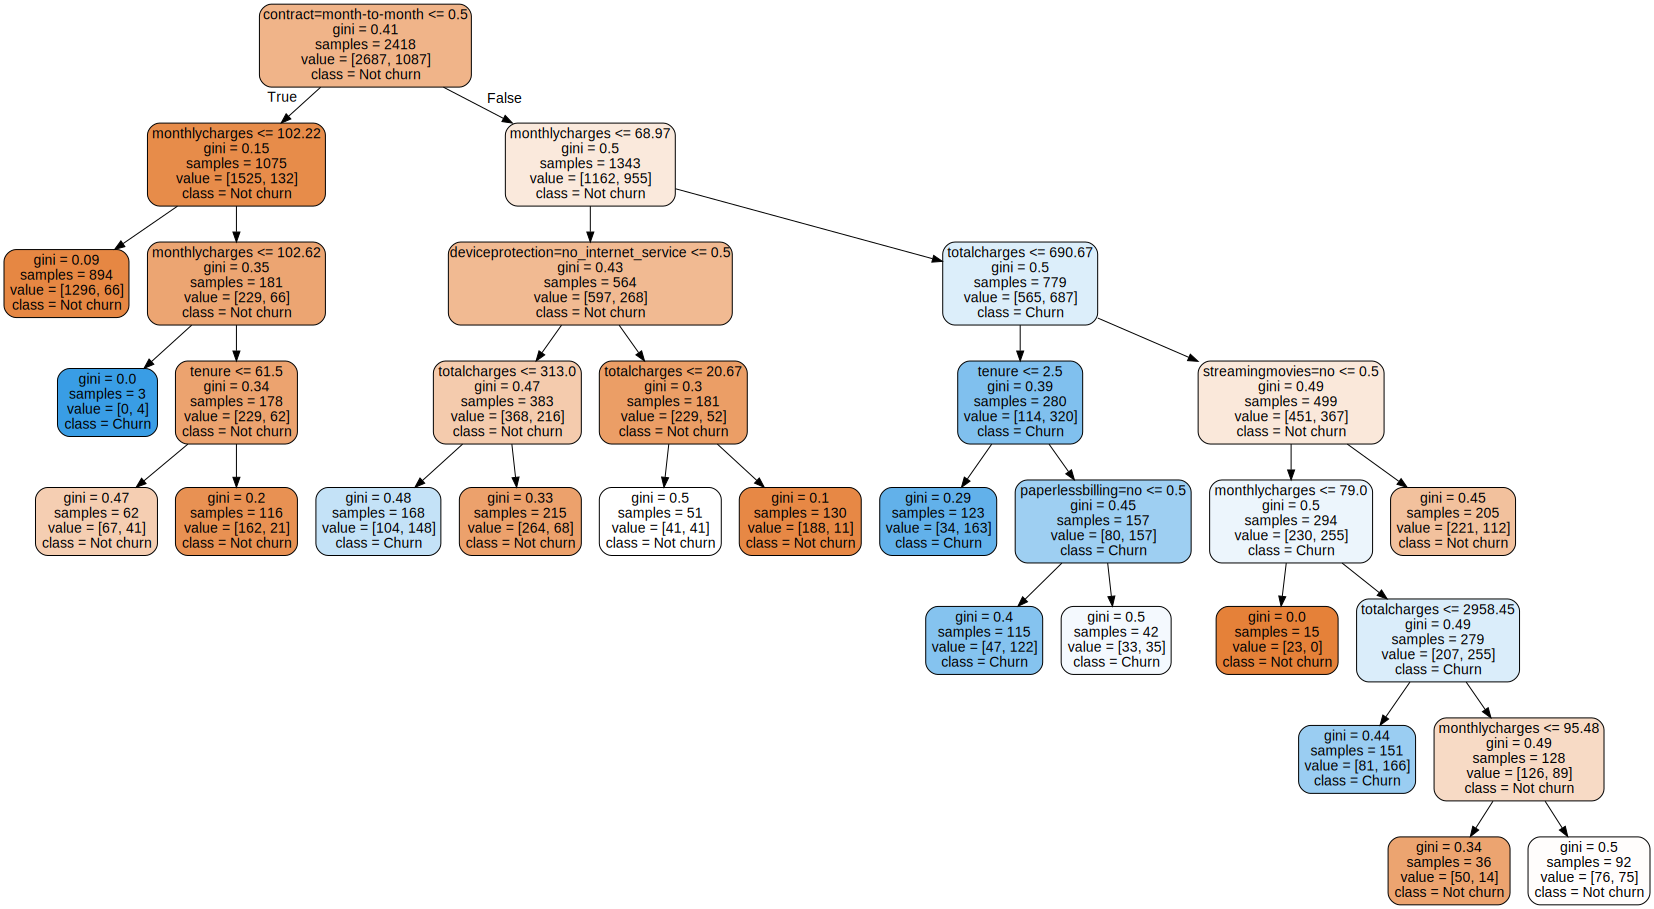

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0     LR_RFE  0.567494  0.589023  0.840159  0.536468   0.654824  0.798192
1     RF_RFE  0.506726  0.542493  0.842143  0.458927   0.668118  0.792333

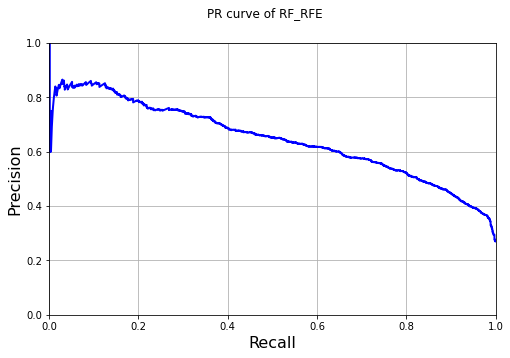

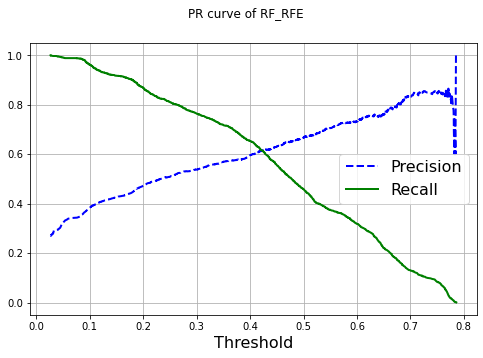

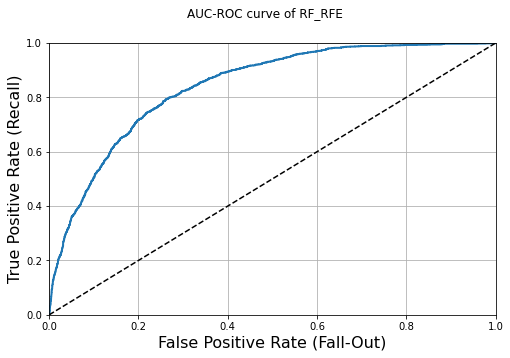

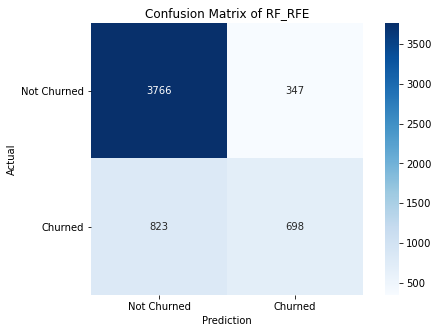

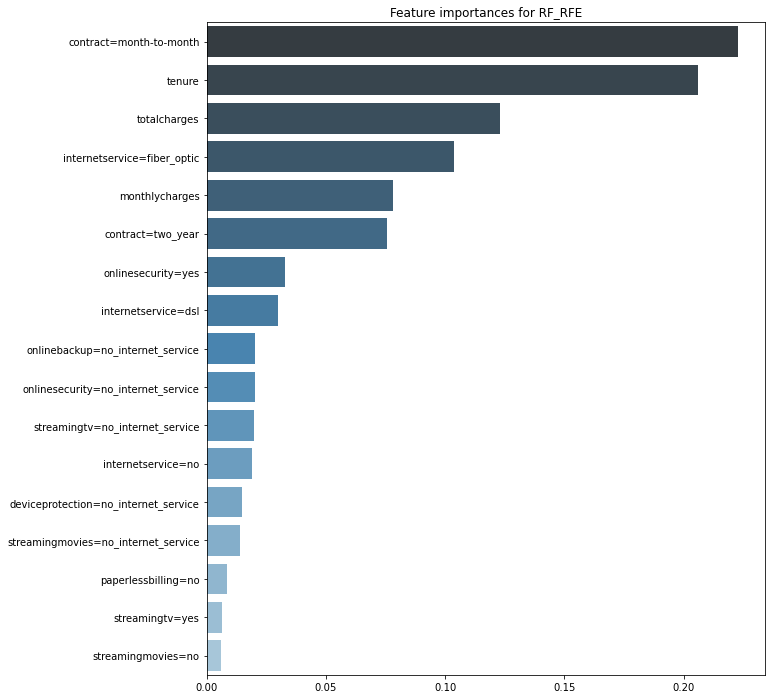

In [129]:
# Random Forest
random_forest_rfe_model = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, n_jobs=-1, random_state=7)
random_forest_rfe_model_name = 'RF_RFE'
cv = 10

options = defaultdict(bool)
options['feature_importance_available'] =  True
options['tree_based'] = True
options['estimated_tree'] = 190

model_summary(random_forest_rfe_model_name, random_forest_rfe_model, X_train_full_not_scaled_rfe, y_train_full, 
              X_train_not_scaled_rfe, y_train, X_val_not_scaled_rfe, y_val, cv, all_features_rfe, 
              evaluation_metrics, 
              feature_selection_metrics_collector_map,
              options = options)

#### Univariate Selection

In [130]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

select = SelectKBest(score_func = chi2, k = 3)
fit = select.fit(X_train_full_not_scaled , y_train_full)

chi_score_df = pd.DataFrame(
    {"features" : all_features,
     "scores" : fit.scores_,
     "p_values": fit.pvalues_ 
    })

chi_score_df = chi_score_df.sort_values(by = "scores" , ascending = False)
chi_score_df["feature_type"] = np.where(chi_score_df["features"].isin(numerical_features), "Numerical", "Categorical")

In [131]:
chi_score_df.head()

features         scores      p_values feature_type
44             totalcharges  489835.855264  0.000000e+00    Numerical
42                   tenure   13029.363232  0.000000e+00    Numerical
43           monthlycharges    3052.497539  0.000000e+00    Numerical
0   contract=month-to-month     411.969108  1.366170e-91  Categorical
2         contract=two_year     398.361755  1.251877e-88  Categorical

In [132]:
#top 3 categorical features
features_cat  = chi_score_df[chi_score_df["feature_type"] == "Categorical"]["features"][:3].tolist()

#top 3 numerical features
features_num  = chi_score_df[chi_score_df["feature_type"] == "Numerical"]["features"][:3].tolist()

In [133]:
X_train_full_not_scaled_top_cat = get_X_with_specific_features(X_train_full_not_scaled,
                                                               features_cat,
                                                               all_features)

X_train_not_scaled_top_cat = get_X_with_specific_features(X_train_not_scaled,
                                                               features_cat,
                                                               all_features)

X_val_not_scaled_top_cat = get_X_with_specific_features(X_val_not_scaled,
                                                               features_cat,
                                                               all_features)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      4113
           1       0.54      0.53      0.54      1521

    accuracy                           0.75      5634
   macro avg       0.69      0.68      0.68      5634
weighted avg       0.75      0.75      0.75      5634



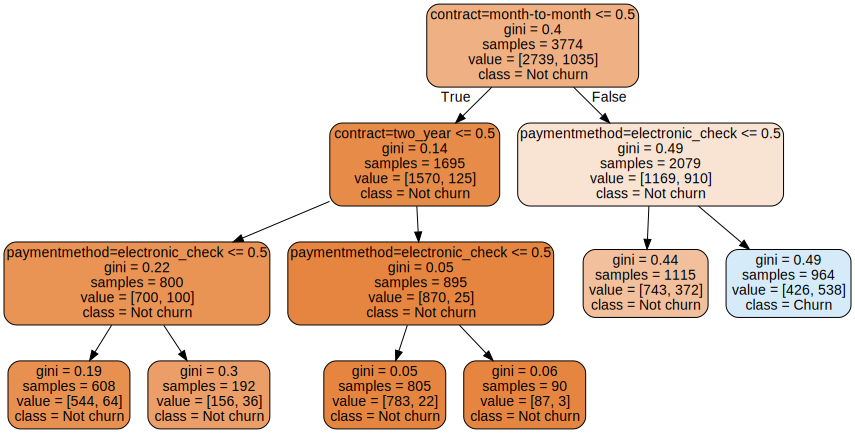

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0      LR_RFE  0.567494  0.589023  0.840159  0.536468   0.654824  0.798192
1      RF_RFE  0.506726  0.542493  0.842143  0.458927   0.668118  0.792333
2  DT_top_cat  0.531336  0.534569  0.780841  0.526677   0.544168  0.752932

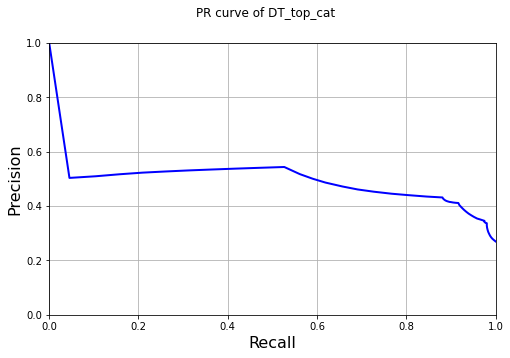

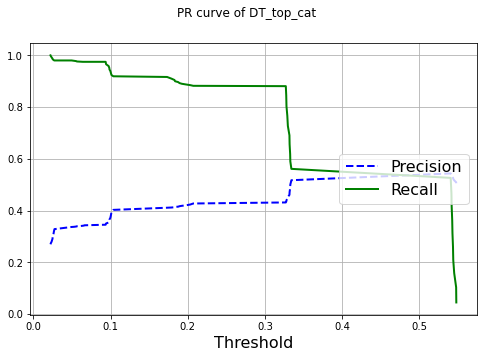

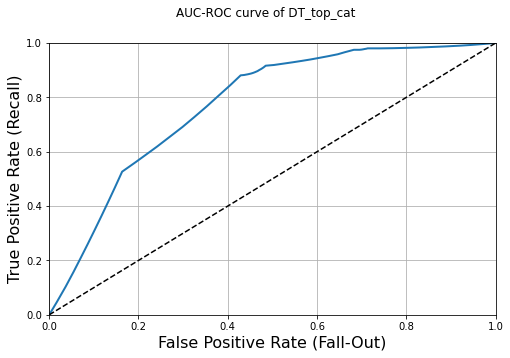

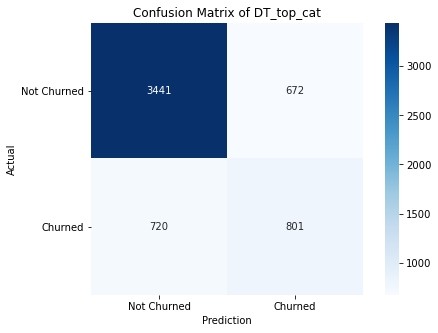

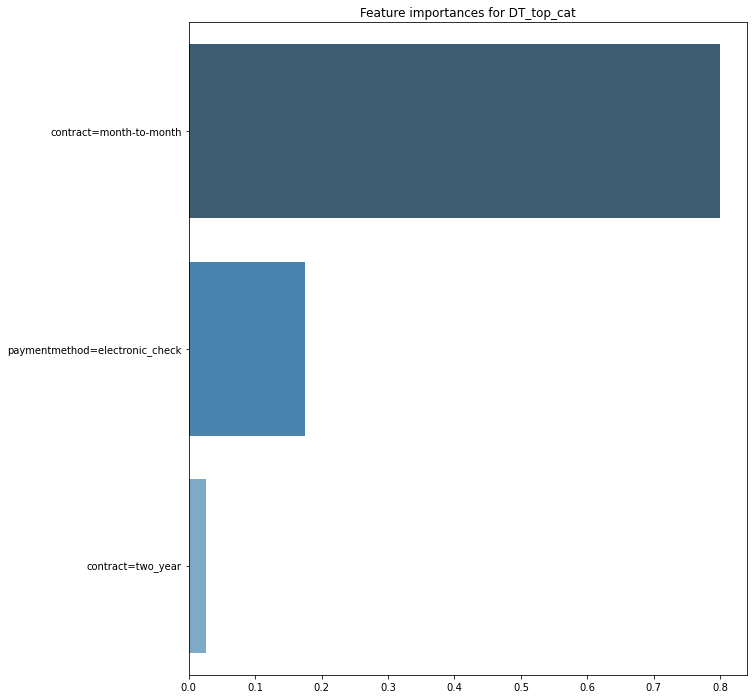

In [134]:
dt_classifier = DecisionTreeClassifier(random_state= 7, max_depth = 3)
dt_classifier_name = 'DT_top_cat'
cv = 10
options = defaultdict(bool)
options['feature_importance_available'] =  True
options['tree_based'] = True

model_summary(dt_classifier_name, dt_classifier, X_train_full_not_scaled_top_cat, y_train_full, 
              X_train_not_scaled_top_cat, y_train, X_val_not_scaled_top_cat, y_val, cv, features_cat, 
              evaluation_metrics, feature_selection_metrics_collector_map,
              options = options)

In [135]:
X_train_full_not_scaled_top_num = get_X_with_specific_features(X_train_full_not_scaled,
                                                               features_num,
                                                               all_features)

X_train_not_scaled_top_num = get_X_with_specific_features(X_train_not_scaled,
                                                               features_num,
                                                               all_features)

X_val_not_scaled_top_num = get_X_with_specific_features(X_val_not_scaled,
                                                               features_num,
                                                               all_features)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      4113
           1       0.64      0.40      0.50      1521

    accuracy                           0.78      5634
   macro avg       0.72      0.66      0.68      5634
weighted avg       0.76      0.78      0.76      5634



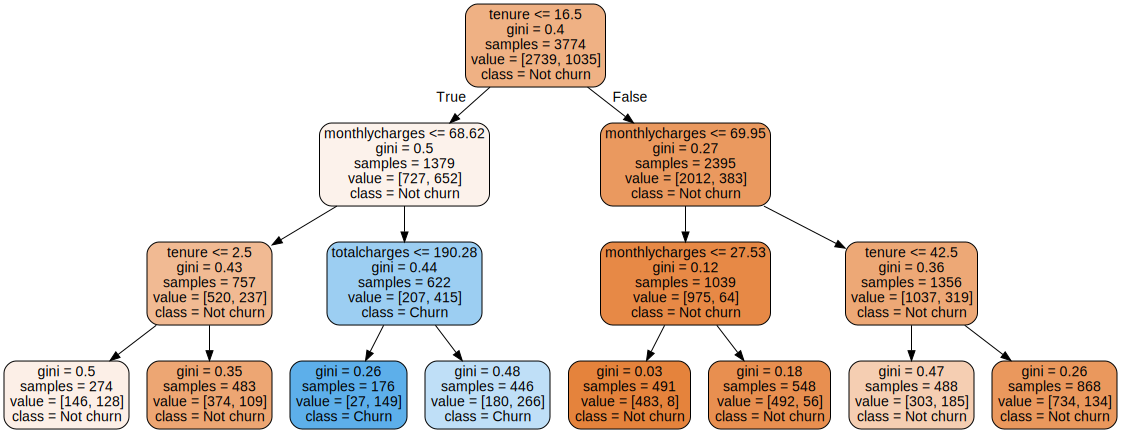

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0      LR_RFE  0.567494  0.589023  0.840159  0.536468   0.654824  0.798192
1      RF_RFE  0.506726  0.542493  0.842143  0.458927   0.668118  0.792333
2  DT_top_cat  0.531336  0.534569  0.780841  0.526677   0.544168  0.752932
3  DT_top_num  0.455616  0.494407  0.784901  0.404992   0.636610  0.777245

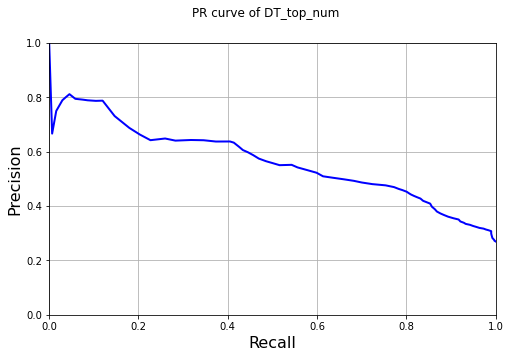

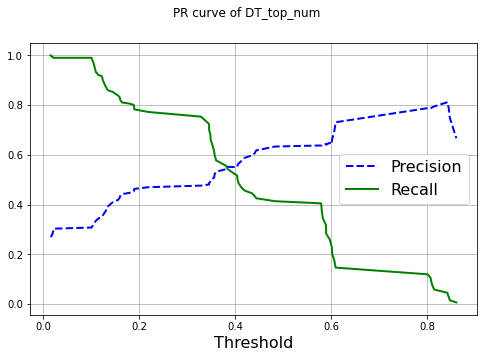

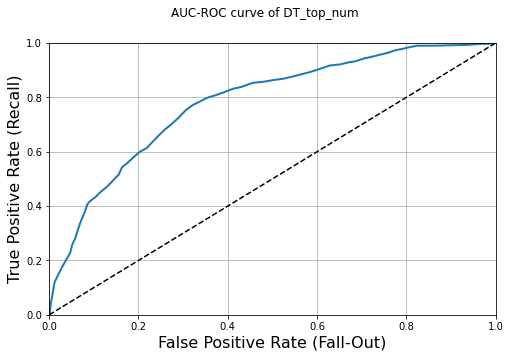

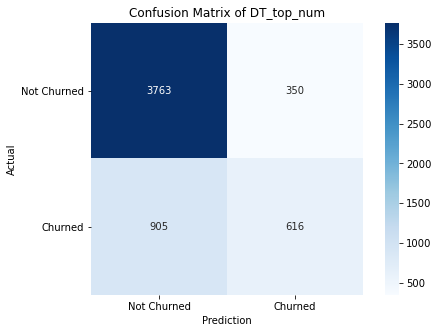

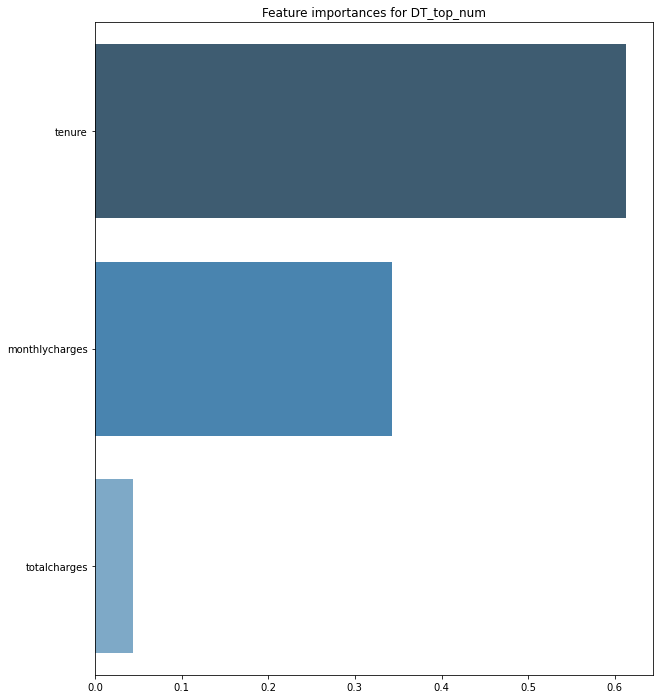

In [136]:
dt_classifier = DecisionTreeClassifier(random_state= 7, max_depth = 3)
dt_classifier_name = 'DT_top_num'
cv = 10
options = defaultdict(bool)
options['feature_importance_available'] =  True
options['tree_based'] = True

model_summary(dt_classifier_name, dt_classifier, X_train_full_not_scaled_top_num, y_train_full, 
              X_train_not_scaled_top_num, y_train, X_val_not_scaled_top_num, y_val, cv, features_num, 
              evaluation_metrics, feature_selection_metrics_collector_map,
              options = options)


### Comparing performance of models trained in Phase I, II and III

In [137]:
model_to_evaluation_metrics_df_by_f1_point_5

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
5        GNB  0.667782  0.592313  0.813847  0.838949   0.457860  0.688140
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
6        LDA  0.572806  0.589451  0.833326  0.548314   0.638680  0.793933
4      B_SVC  0.562550  0.592603  0.830953  0.543037   0.644247  0.799430
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120

In [138]:
model_to_mean_evaluation_metrics_with_smote_df_by_f1_point_5 = model_to_mean_evaluation_metrics_with_smote_df.sort_values(by=['f1.5'],ascending=False)
model_to_mean_evaluation_metrics_with_smote_df_by_f1_point_5

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.685354  0.630107  0.841196  0.797519   0.521142  0.747247
5        LDA  0.677498  0.622697  0.838220  0.788966   0.514777  0.741742
2         RF  0.666404  0.627118  0.837751  0.740987   0.544078  0.761982
6      B_SVC  0.666219  0.608280  0.832692  0.786008   0.496104  0.735484
1         DT  0.636844  0.591624  0.791567  0.725860   0.499632  0.729318
4        GNB  0.622011  0.568577  0.766290  0.732405   0.464943  0.699860
3        KNN  0.588759  0.548260  0.739152  0.667982   0.465316  0.702872

In [139]:
model_to_evaluation_metrics_with_feature_selection_df = pd.DataFrame(feature_selection_metrics_collector_map)
model_to_evaluation_metrics_with_feature_selection_df_f1_point_5 = model_to_evaluation_metrics_with_feature_selection_df.sort_values(by=['f1.5'],ascending=False)
model_to_evaluation_metrics_with_feature_selection_df_f1_point_5

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0      LR_RFE  0.567494  0.589023  0.840159  0.536468   0.654824  0.798192
2  DT_top_cat  0.531336  0.534569  0.780841  0.526677   0.544168  0.752932
1      RF_RFE  0.506726  0.542493  0.842143  0.458927   0.668118  0.792333
3  DT_top_num  0.455616  0.494407  0.784901  0.404992   0.636610  0.777245

In [140]:
baseline_performance_metrics_df

model_name      f1.5        f1  roc_auc  recall  \
0  Always Minority Class Baseline  0.534789  0.414322      0.5     1.0   

   precision  accuracy  
0    0.26129   0.26129

Based on `fbeta score (beta = 1.5)` , we can select following models to further hyperparameter tuning:
- Logistic Regression with smote (Fbeta score = 0.685354)
- Random Forest with smote (Fbeta score = 0.666404)
- LDA with smote (Fbeta score = 0.677498)
- GNB with basic settings (Fbeta score  = 0.667782)

LDA in sklearn has no hyperparameters to tune. https://scikit-learn.org/stable/modules/lda_qda.html . Similarly GNB has no hyperparameters as well. We will now try to further fine tune our selected models:
- Logistic Regression with smote (Fbeta score = 0.685354)
- Random Forest with smote (Fbeta score = 0.666404)


### Fine tuning the selected models

#### Hyperparameter tuning of Logistic Regression model

We will try logistic regression with following variations:
- l1 regularization
- l2 regularization

Training : LR-l1-C-0.001


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.90      0.67      0.76      4113
         1.0       0.47      0.79      0.59      1521

    accuracy                           0.70      5634
   macro avg       0.68      0.73      0.67      5634
weighted avg       0.78      0.70      0.72      5634

Training : LR-l1-C-0.01


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.90      0.71      0.79      4113
         1.0       0.50      0.79      0.61      1521

    accuracy                           0.73      5634
   macro avg       0.70      0.75      0.70      5634
weighted avg       0.79      0.73      0.75      5634

Training : LR-l1-C-0.1


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      4113
         1.0       0.52      0.80      0.63      1521

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634

Training : LR-l1-C-0.5


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      4113
         1.0       0.52      0.80      0.63      1521

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634

Training : LR-l1-C-1


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      4113
         1.0       0.52      0.80      0.63      1521

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634

Training : LR-l1-C-10


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.m

              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      4113
         1.0       0.52      0.80      0.63      1521

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634

Training : LR-l2-C-0.001


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

              precision    recall  f1-score   support

         0.0       0.90      0.73      0.80      4113
         1.0       0.51      0.77      0.61      1521

    accuracy                           0.74      5634
   macro avg       0.70      0.75      0.71      5634
weighted avg       0.79      0.74      0.75      5634

Training : LR-l2-C-0.01


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81      4113
         1.0       0.53      0.78      0.63      1521

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634

Training : LR-l2-C-0.1


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      4113
         1.0       0.52      0.80      0.63      1521

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634

Training : LR-l2-C-0.5


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      4113
         1.0       0.52      0.80      0.63      1521

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634

Training : LR-l2-C-1


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      4113
         1.0       0.52      0.80      0.63      1521

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634

Training : LR-l2-C-10
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      4113
         1.0       0.52      0.80      0.63      1521

    accuracy                           0.75      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.80      0.75      0.76      5634



/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much m

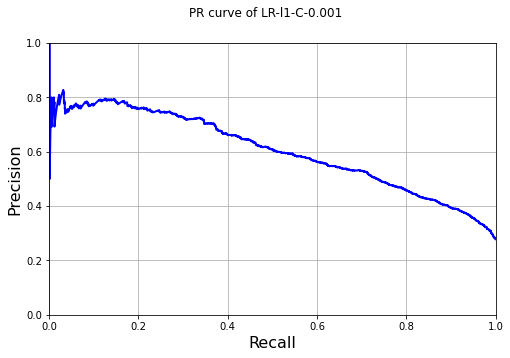

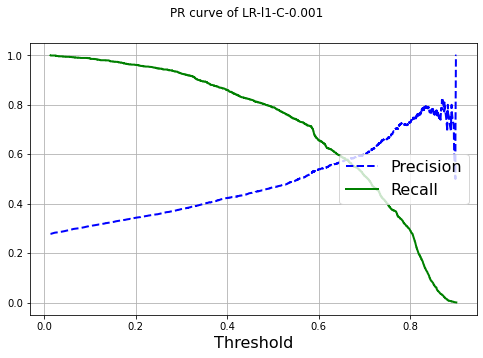

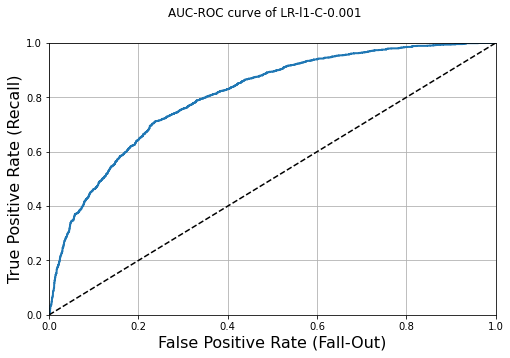

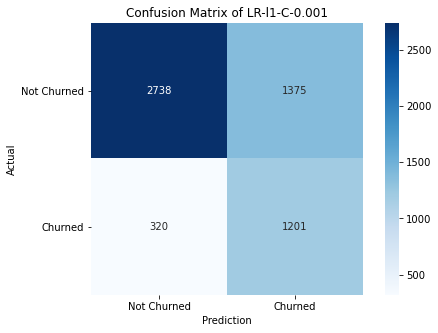

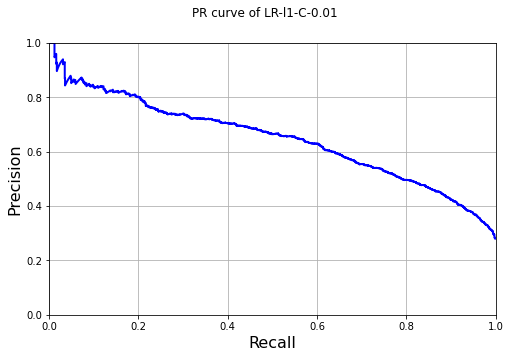

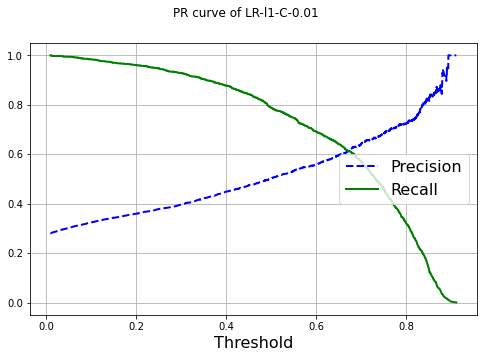

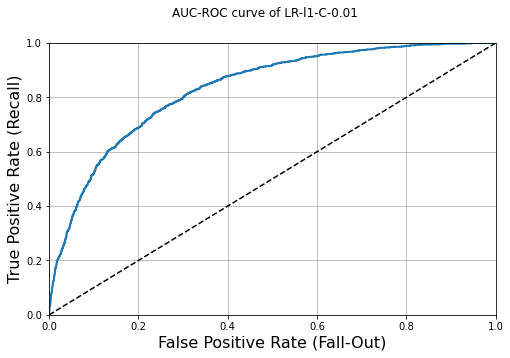

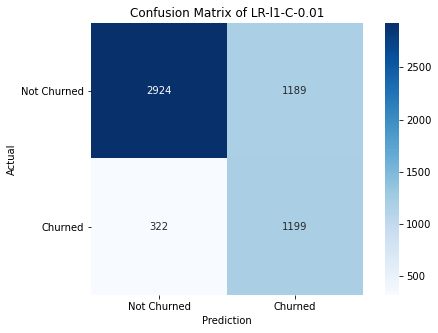

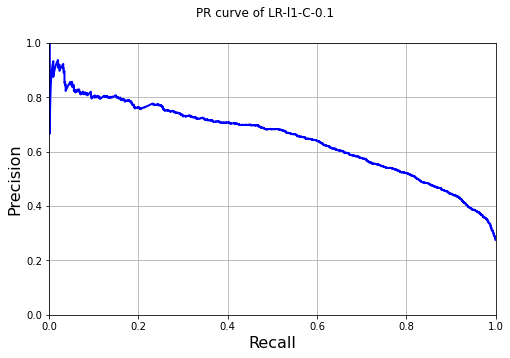

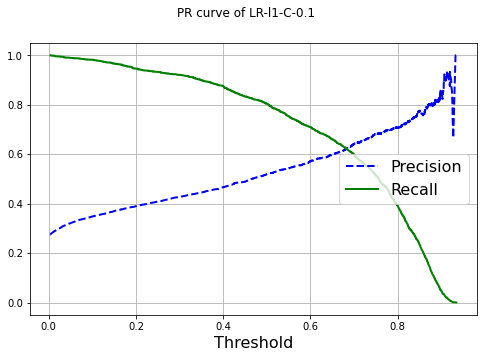

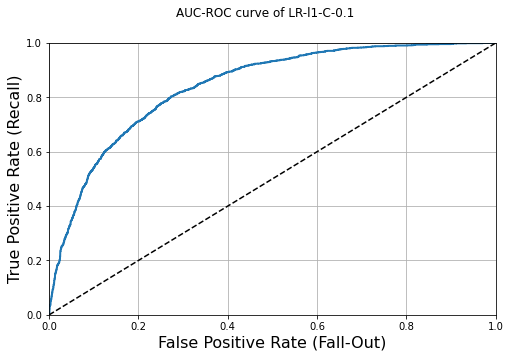

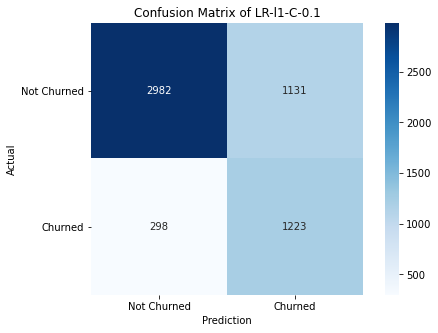

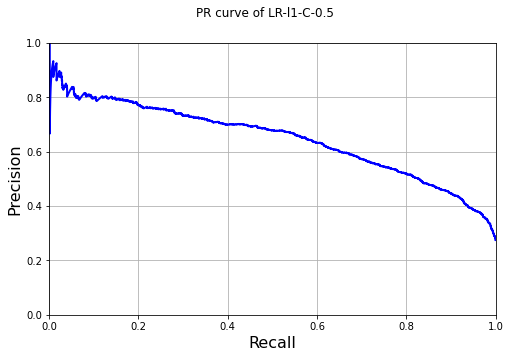

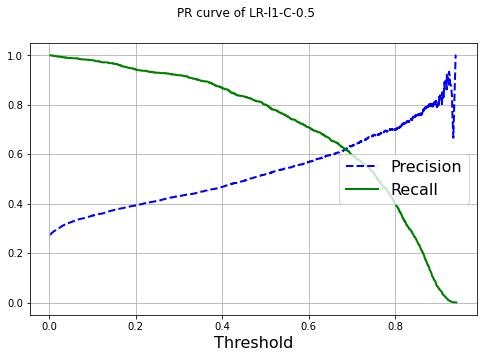

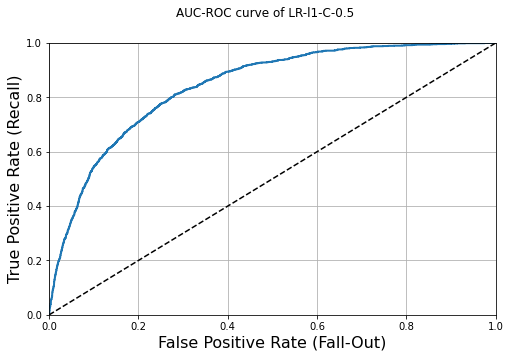

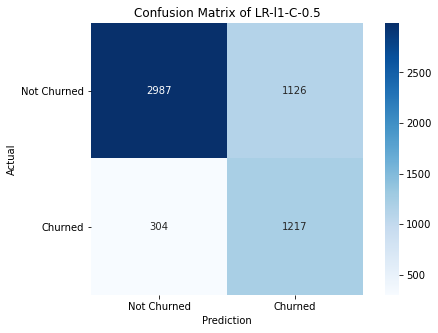

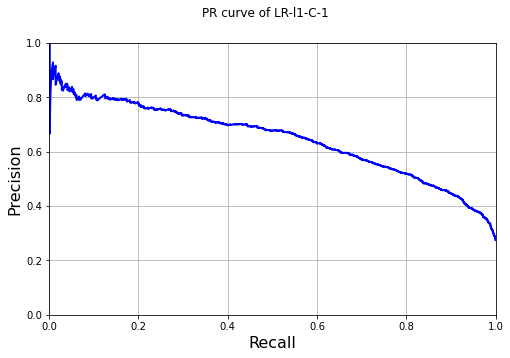

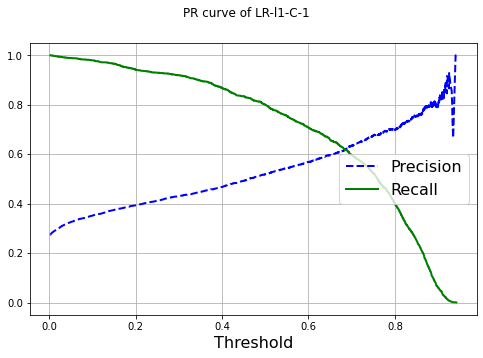

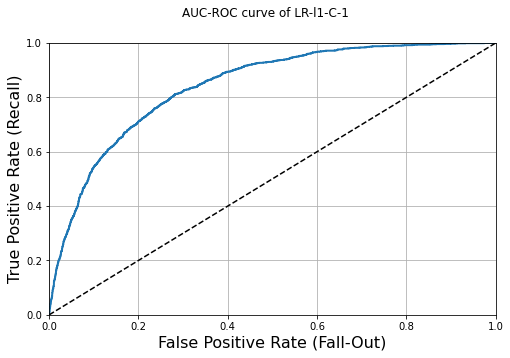

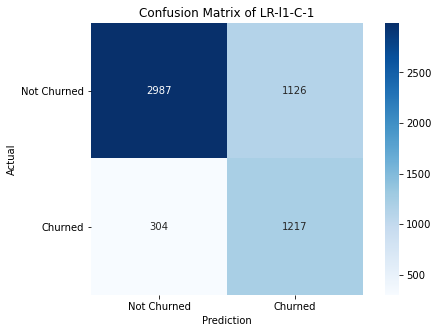

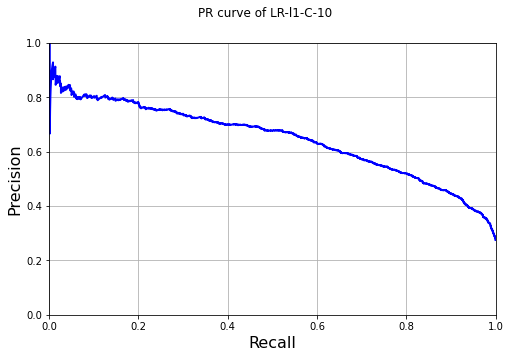

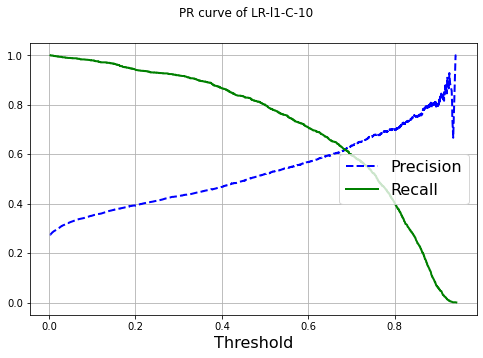

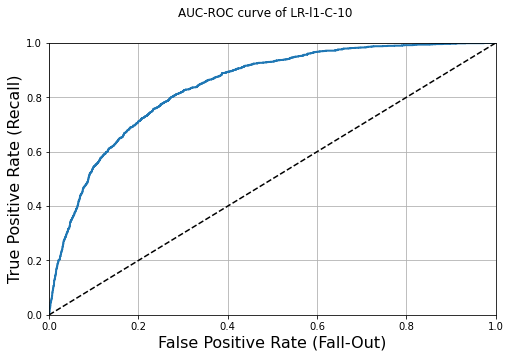

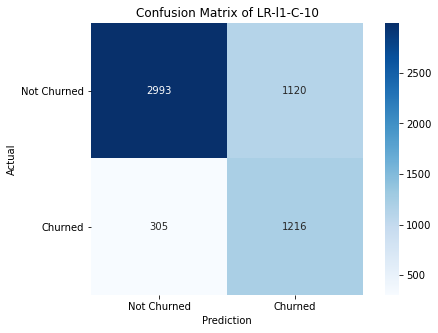

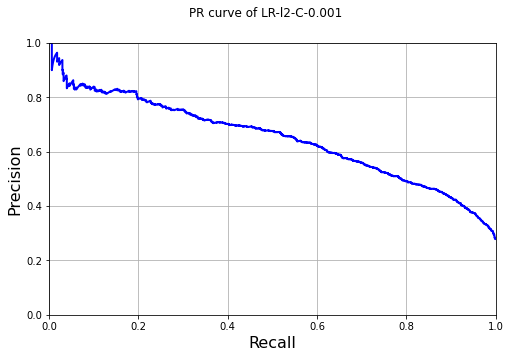

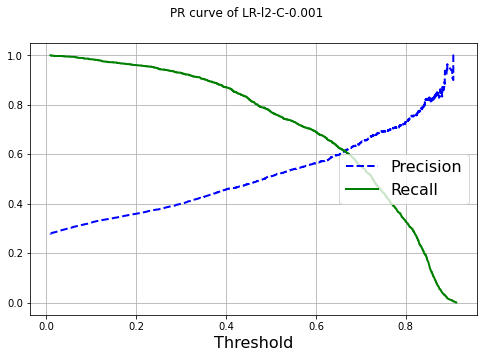

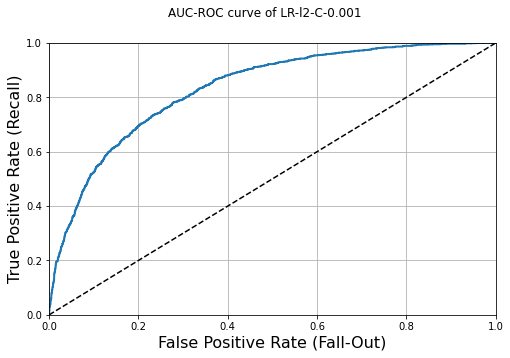

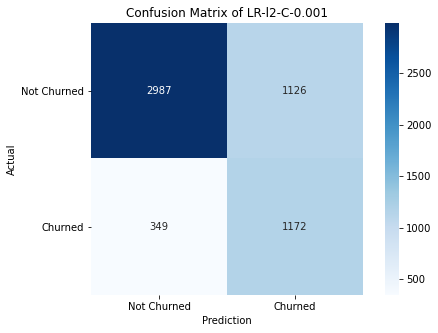

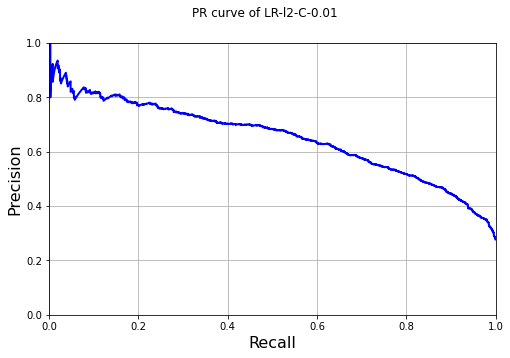

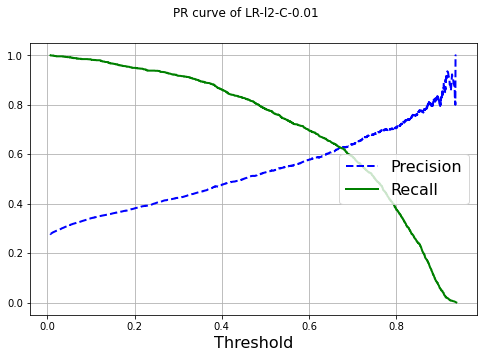

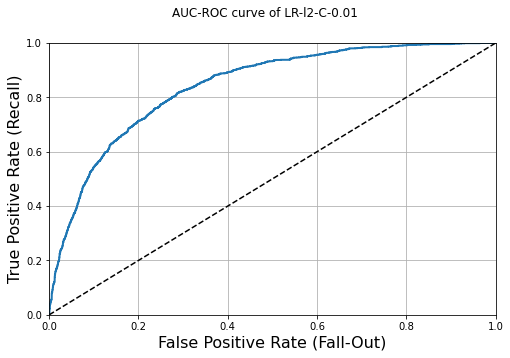

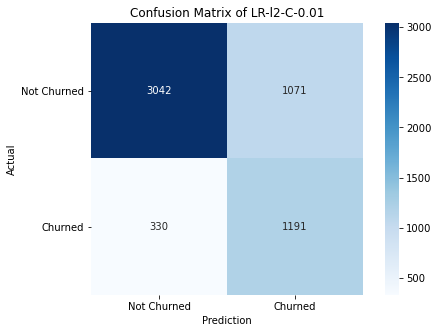

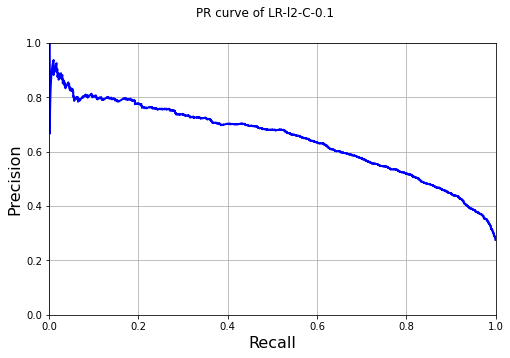

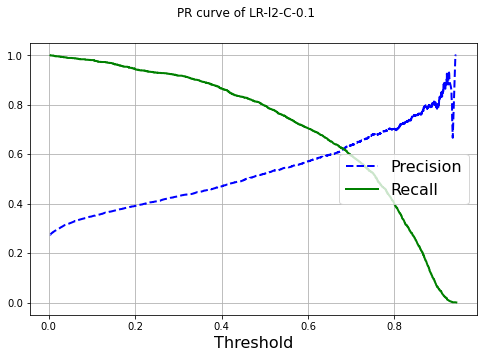

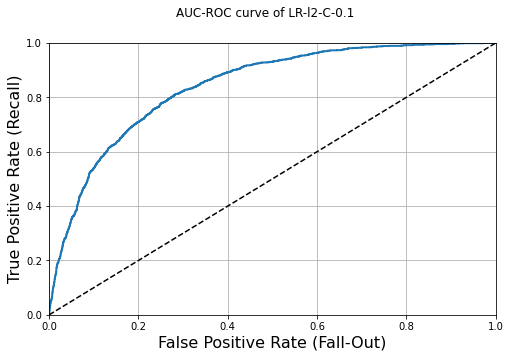

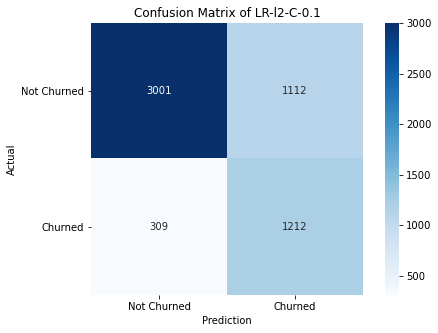

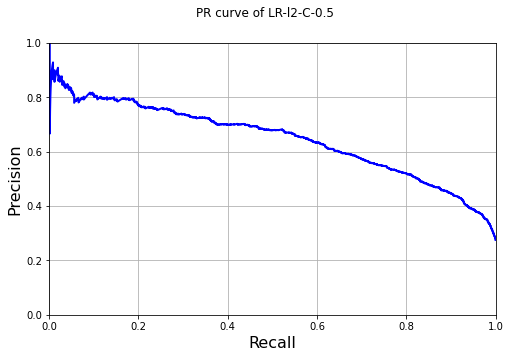

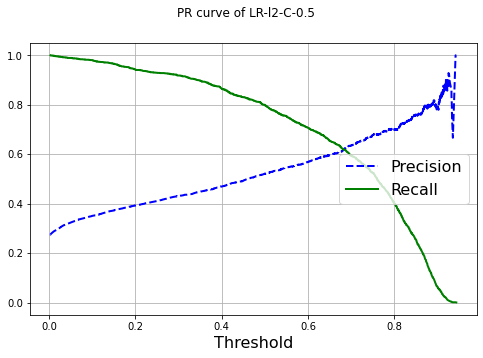

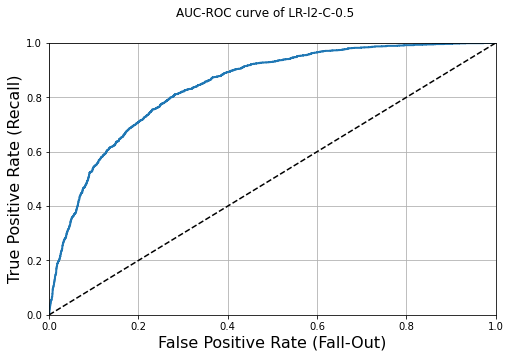

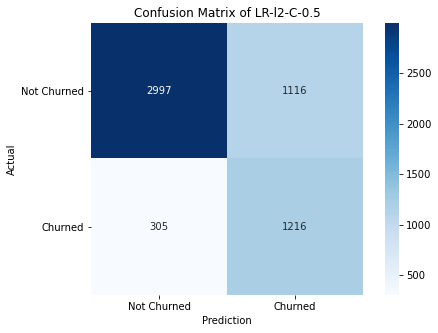

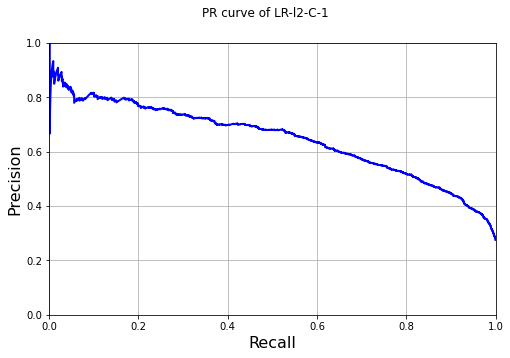

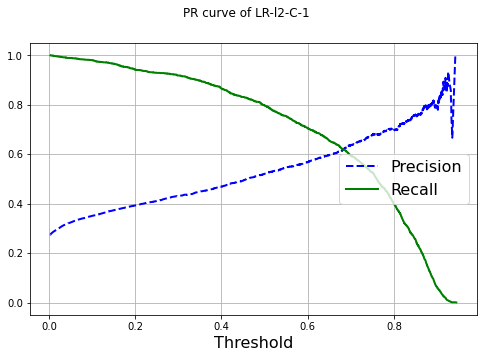

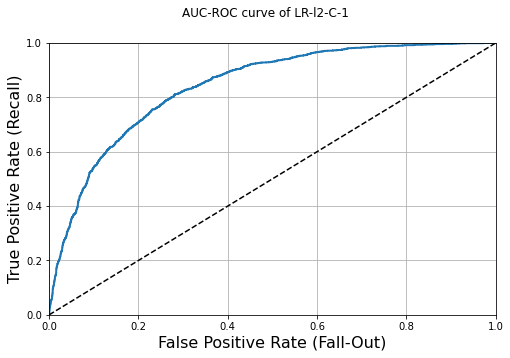

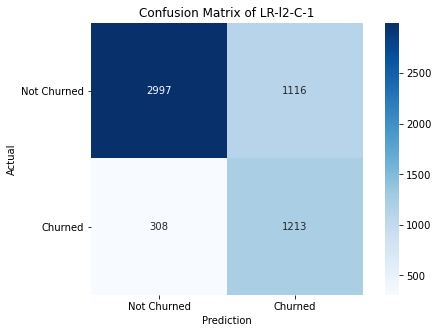

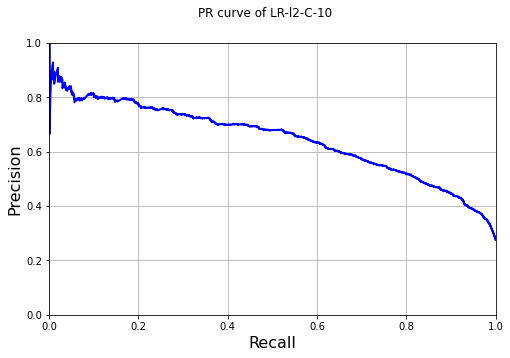

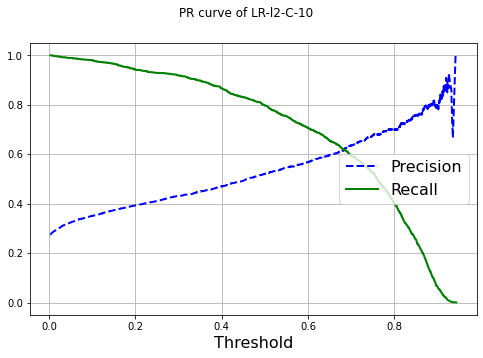

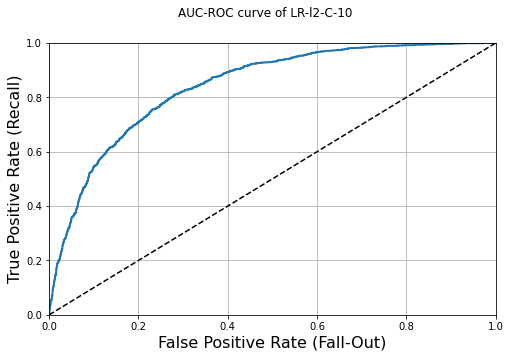

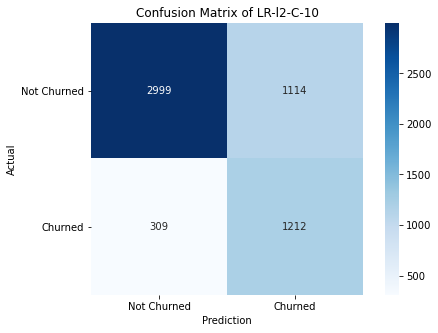

In [141]:
# l1 and l2 penalty

hyperparameter_tuning_model_to_evaluation_metrics_map = {}
smote_lr_model_names_to_model_objects_map = {}
for penalty in ['l1', 'l2']:
    for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
        lr_model = LogisticRegression(solver='liblinear', random_state= 42, C= C, penalty= penalty)
        lr_model_name = 'LR-{}-C-{}'.format(penalty, C)
        smote_lr_model_names_to_model_objects_map[lr_model_name]  = {
            'definition' : lr_model,
            'options' : {'scaling_required' : True, 'kfold' : 10}
        }

        print("Training : {}".format(lr_model_name))
        model_summary_with_smote(lr_model_name, smote_lr_model_names_to_model_objects_map[lr_model_name], 
                                 X_train_full_scaled, y_train_full, X_train_full_not_scaled, 
                                 hyperparameter_tuning_model_to_evaluation_metrics_map, 
                                 evaluation_metrics)

In [142]:
hyperparameter_tuning_model_to_mean_evaluation_metrics_df = get_model_to_mean_evaluation_metrics_with_smote_df(
    hyperparameter_tuning_model_to_evaluation_metrics_map)
hyperparameter_tuning_model_to_mean_evaluation_metrics_df


model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0   LR-l1-C-0.001  0.650615  0.586243  0.807395  0.789607   0.466444  0.699142
1    LR-l1-C-0.01  0.670698  0.613623  0.831910  0.788304   0.502653  0.731805
2     LR-l1-C-0.1  0.688061  0.631327  0.842037  0.804076   0.520171  0.746358
3     LR-l1-C-0.5  0.685948  0.629924  0.841516  0.800146   0.519841  0.746182
4       LR-l1-C-1  0.685958  0.629924  0.841415  0.800146   0.519800  0.746182
5      LR-l1-C-10  0.686208  0.630516  0.841325  0.799488   0.520873  0.747070
6   LR-l2-C-0.001  0.665988  0.613993  0.832435  0.770554   0.510512  0.738195
7    LR-l2-C-0.01  0.680892  0.629662  0.841157  0.783050   0.526821  0.751329
8     LR-l2-C-0.1  0.685366  0.630379  0.841156  0.796857   0.521789  0.747779
9     LR-l2-C-0.5  0.686696  0.631179  0.841206  0.799493   0.521759  0.747779
10      LR-l2-C-1  0.685354  0.630107  0.841196  0.797519   0.521142  0.747247
11     LR-l2-C-10  0.685122  0.630045  0.841102  0.796861   0.521337  0.747424

In [143]:
hyperparameter_tuning_model_to_mean_evaluation_metrics_df_by_f1_point_5 = hyperparameter_tuning_model_to_mean_evaluation_metrics_df.sort_values(by=['f1.5'],ascending=False)
hyperparameter_tuning_model_to_mean_evaluation_metrics_df_by_f1_point_5

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
2     LR-l1-C-0.1  0.688061  0.631327  0.842037  0.804076   0.520171  0.746358
9     LR-l2-C-0.5  0.686696  0.631179  0.841206  0.799493   0.521759  0.747779
5      LR-l1-C-10  0.686208  0.630516  0.841325  0.799488   0.520873  0.747070
4       LR-l1-C-1  0.685958  0.629924  0.841415  0.800146   0.519800  0.746182
3     LR-l1-C-0.5  0.685948  0.629924  0.841516  0.800146   0.519841  0.746182
8     LR-l2-C-0.1  0.685366  0.630379  0.841156  0.796857   0.521789  0.747779
10      LR-l2-C-1  0.685354  0.630107  0.841196  0.797519   0.521142  0.747247
11     LR-l2-C-10  0.685122  0.630045  0.841102  0.796861   0.521337  0.747424
7    LR-l2-C-0.01  0.680892  0.629662  0.841157  0.783050   0.526821  0.751329
1    LR-l1-C-0.01  0.670698  0.613623  0.831910  0.788304   0.502653  0.731805
6   LR-l2-C-0.001  0.665988  0.613993  0.832435  0.770554   0.510512  0.738195
0   LR-l1-C-0.001  0.650615  0.586243  0.807395  0.789607   0.466444  0.699142

As we can see in the table above, logistic regression model with L1 regularization and C value equal to 0.1 has highest `f1.5` value of `0.688061`.

#### Hyperparameter tuning of Random Forest model

We will tune following parameters of random forest model:
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- max_leaf_nodes = max number of leaf nodes
- bootstrap = method for sampling data points (with or without replacement)


In [144]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Max number of leaf nodes
max_leaf_nodes = np.arange(2,60,1)
# Create the random grid
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__max_leaf_nodes' : max_leaf_nodes,
               'rf__bootstrap': bootstrap}

In [145]:
from imblearn.pipeline import Pipeline

pipeline = Pipeline([("smote", SMOTE(random_state= 7)), ("rf", RandomForestClassifier(random_state=42))])

skfolds = StratifiedKFold(n_splits= 3, random_state=42)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = pipeline, 
                               param_distributions = random_grid, 
                               scoring= f_scorer,
                               n_iter = 100, 
                               cv = skfolds, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [146]:
# Fit the random search model
rf_random.fit(X_train_full_not_scaled, y_train_full)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=False),
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=7)),
                                             ('rf',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'rf__bootstrap': [True, False],
                                        'rf__max_depth': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90, 100,
                                                          110, None],
                                        'rf__max_features': ['auto', 'sqrt'],
                                        'rf__max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50

In [147]:
rf_random.best_params_

{'rf__n_estimators': 400,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 4,
 'rf__max_leaf_nodes': 2,
 'rf__max_features': 'auto',
 'rf__max_depth': None,
 'rf__bootstrap': False}

Training : best_random_forest_rcv


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78      4113
         1.0       0.48      0.81      0.61      1521

    accuracy                           0.72      5634
   macro avg       0.70      0.75      0.69      5634
weighted avg       0.79      0.72      0.73      5634



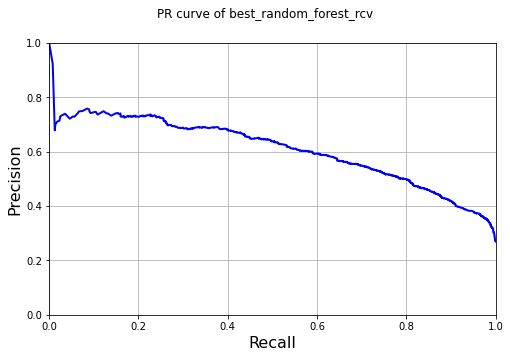

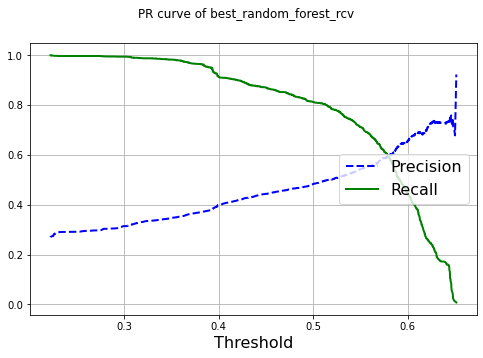

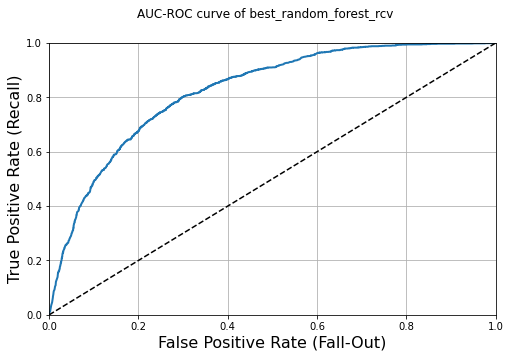

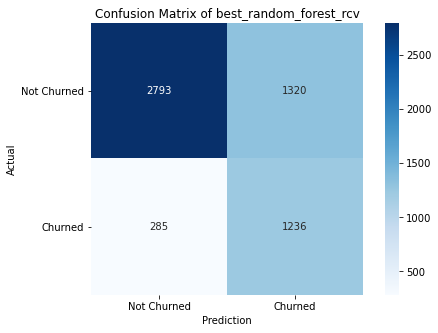

In [148]:
best_random_forest_rcv = RandomForestClassifier(
    n_estimators= 400,
    min_samples_split= 2,
    min_samples_leaf=  4,
    max_leaf_nodes= 2,   
    max_features= 'auto',
    max_depth= None,
    bootstrap= False,
    n_jobs=-1, 
    random_state= 42
)

rf_rcv_model_name = 'best_random_forest_rcv'
rf_rcv_model_map  = {
    'definition' : best_random_forest_rcv,
    'options' : {'scaling_required' : False, 'kfold' : 10}
}

print("Training : {}".format(rf_rcv_model_name))
model_summary_with_smote(rf_rcv_model_name, rf_rcv_model_map, 
                         X_train_full_scaled, y_train_full, X_train_full_not_scaled, 
                         hyperparameter_tuning_model_to_evaluation_metrics_map, 
                         evaluation_metrics)

In [149]:
hyperparameter_tuning_model_to_mean_evaluation_metrics_df = get_model_to_mean_evaluation_metrics_with_smote_df(
    hyperparameter_tuning_model_to_evaluation_metrics_map)
hyperparameter_tuning_model_to_mean_evaluation_metrics_df

model_name      f1.5        f1   roc_auc    recall  precision  \
0            LR-l1-C-0.001  0.650615  0.586243  0.807395  0.789607   0.466444   
1             LR-l1-C-0.01  0.670698  0.613623  0.831910  0.788304   0.502653   
2              LR-l1-C-0.1  0.688061  0.631327  0.842037  0.804076   0.520171   
3              LR-l1-C-0.5  0.685948  0.629924  0.841516  0.800146   0.519841   
4                LR-l1-C-1  0.685958  0.629924  0.841415  0.800146   0.519800   
5               LR-l1-C-10  0.686208  0.630516  0.841325  0.799488   0.520873   
6            LR-l2-C-0.001  0.665988  0.613993  0.832435  0.770554   0.510512   
7             LR-l2-C-0.01  0.680892  0.629662  0.841157  0.783050   0.526821   
8              LR-l2-C-0.1  0.685366  0.630379  0.841156  0.796857   0.521789   
9              LR-l2-C-0.5  0.686696  0.631179  0.841206  0.799493   0.521759   
10               LR-l2-C-1  0.685354  0.630107  0.841196  0.797519   0.521142   
11              LR-l2-C-10  0.685122  0.630045  0.841102  0.796861   0.521337   
12  best_random_forest_rcv  0.671985  0.606463  0.824955  0.812655   0.483919   

    accuracy  
0   0.699142  
1   0.731805  
2   0.746358  
3   0.746182  
4   0.746182  
5   0.747070  
6   0.738195  
7   0.751329  
8   0.747779  
9   0.747779  
10  0.747247  
11  0.747424  
12  0.715119

In [150]:
hyperparameter_tuning_model_to_mean_evaluation_metrics_df_by_f1_point_5 = hyperparameter_tuning_model_to_mean_evaluation_metrics_df.sort_values(by=['f1.5'],ascending=False)
hyperparameter_tuning_model_to_mean_evaluation_metrics_df_by_f1_point_5

model_name      f1.5        f1   roc_auc    recall  precision  \
2              LR-l1-C-0.1  0.688061  0.631327  0.842037  0.804076   0.520171   
9              LR-l2-C-0.5  0.686696  0.631179  0.841206  0.799493   0.521759   
5               LR-l1-C-10  0.686208  0.630516  0.841325  0.799488   0.520873   
4                LR-l1-C-1  0.685958  0.629924  0.841415  0.800146   0.519800   
3              LR-l1-C-0.5  0.685948  0.629924  0.841516  0.800146   0.519841   
8              LR-l2-C-0.1  0.685366  0.630379  0.841156  0.796857   0.521789   
10               LR-l2-C-1  0.685354  0.630107  0.841196  0.797519   0.521142   
11              LR-l2-C-10  0.685122  0.630045  0.841102  0.796861   0.521337   
7             LR-l2-C-0.01  0.680892  0.629662  0.841157  0.783050   0.526821   
12  best_random_forest_rcv  0.671985  0.606463  0.824955  0.812655   0.483919   
1             LR-l1-C-0.01  0.670698  0.613623  0.831910  0.788304   0.502653   
6            LR-l2-C-0.001  0.665988  0.613993  0.832435  0.770554   0.510512   
0            LR-l1-C-0.001  0.650615  0.586243  0.807395  0.789607   0.466444   

    accuracy  
2   0.746358  
9   0.747779  
5   0.747070  
4   0.746182  
3   0.746182  
8   0.747779  
10  0.747247  
11  0.747424  
7   0.751329  
12  0.715119  
1   0.731805  
6   0.738195  
0   0.699142

There is not much improvement in `f1.5` score for Random Forest when hyperparameter tuning is done using RandomizedSearchCV. Keeping that in mind, we would stick with Logistic Regression for now.

### Ensemble Models

We will try `LGBMClassifier` and `XGBClassifier` with without smote and with smote.

#### Without Smote

In [151]:
from lightgbm import LGBMClassifier

/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4113
           1       0.56      0.50      0.53      1521

    accuracy                           0.76      5634
   macro avg       0.69      0.68      0.68      5634
weighted avg       0.75      0.76      0.75      5634



model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529
4      B_SVC  0.562550  0.592603  0.830953  0.543037   0.644247  0.799430
5        GNB  0.667782  0.592313  0.813847  0.838949   0.457860  0.688140
6        LDA  0.572806  0.589451  0.833326  0.548314   0.638680  0.793933
7       LGBM  0.513689  0.526257  0.802553  0.495068   0.562919  0.759672

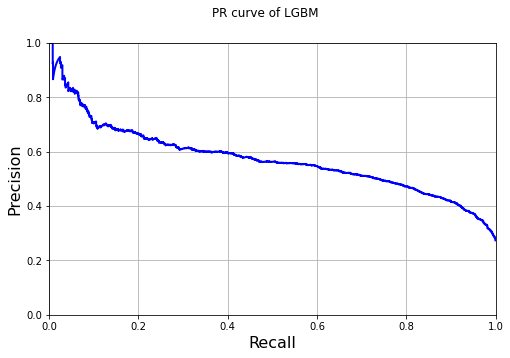

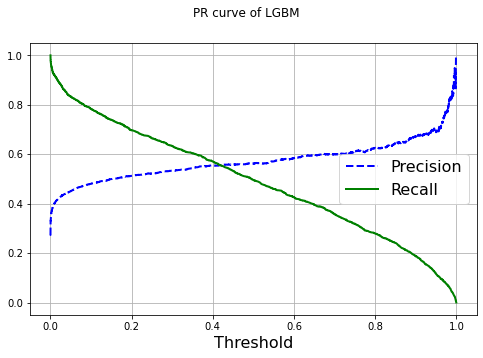

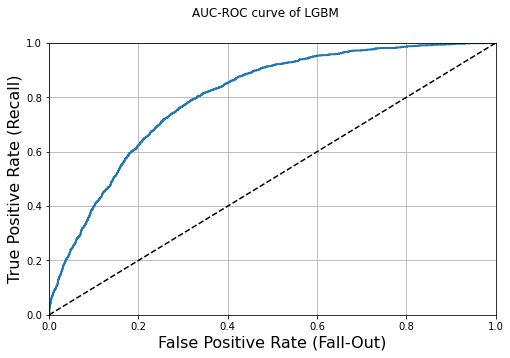

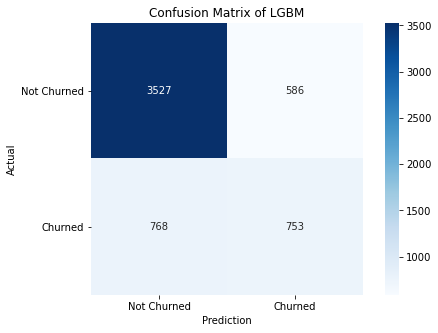

In [152]:
lgbm_c_model_name = 'LGBM'
lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

# ensemble_evaluation_metrics_collector_map = defaultdict(list)
options = defaultdict(bool)

model_summary(lgbm_c_model_name, lgbm_c, X_train_full_scaled, y_train_full, X_train_scaled, 
                  y_train, X_val_scaled, y_val, cv, all_features, evaluation_metrics, metrics_collector_map, 
              options = options)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4113
           1       0.56      0.49      0.52      1521

    accuracy                           0.76      5634
   macro avg       0.69      0.68      0.68      5634
weighted avg       0.75      0.76      0.75      5634



model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0         LR  0.582117  0.601705  0.841965  0.553569   0.660453  0.802454
1         DT  0.449512  0.495489  0.813864  0.391847   0.680234  0.786120
2         RF  0.497648  0.537176  0.840648  0.445756   0.680625  0.793930
3        KNN  0.541260  0.549162  0.779625  0.529253   0.571309  0.765529
4      B_SVC  0.562550  0.592603  0.830953  0.543037   0.644247  0.799430
5        GNB  0.667782  0.592313  0.813847  0.838949   0.457860  0.688140
6        LDA  0.572806  0.589451  0.833326  0.548314   0.638680  0.793933
7       LGBM  0.513689  0.526257  0.802553  0.495068   0.562919  0.759672
8    XGBoost  0.512502  0.525178  0.792908  0.493774   0.562334  0.758788

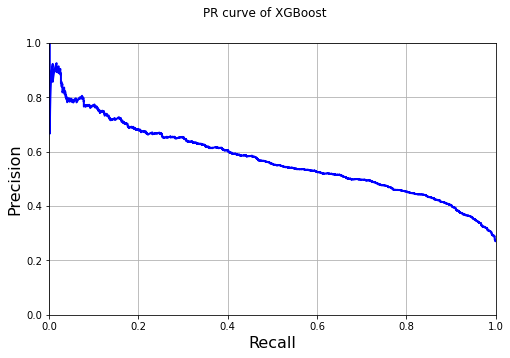

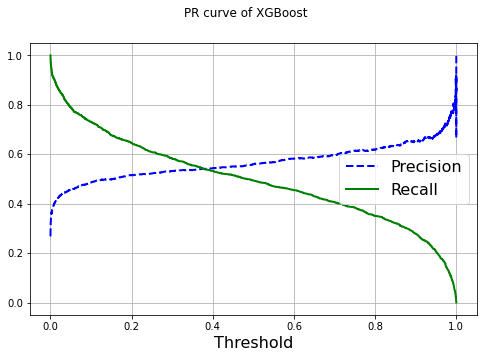

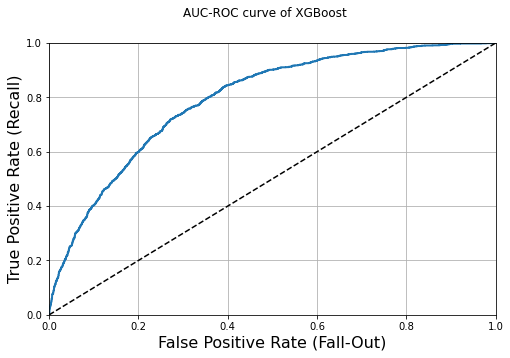

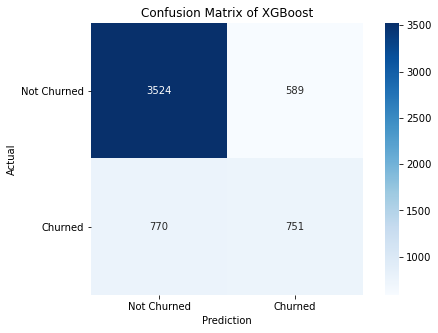

In [153]:
from xgboost import XGBClassifier

xgc_model_name = 'XGBoost'
xgc_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)

options = defaultdict(bool)

model_summary(xgc_model_name, xgc_model, X_train_full_scaled, y_train_full, X_train_scaled, 
                  y_train, X_val_scaled, y_val, cv, all_features, evaluation_metrics, metrics_collector_map, 
              options = options)

#### With Smote

Training : LGBM_Smote


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      4113
         1.0       0.57      0.52      0.55      1521

    accuracy                           0.77      5634
   macro avg       0.70      0.69      0.69      5634
weighted avg       0.76      0.77      0.76      5634



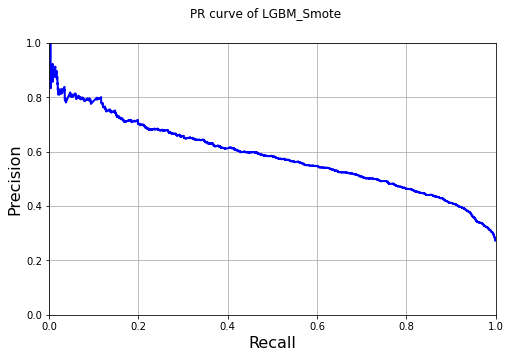

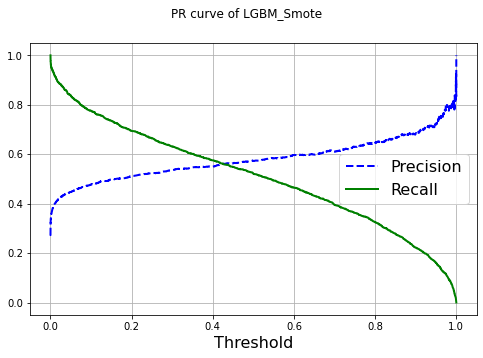

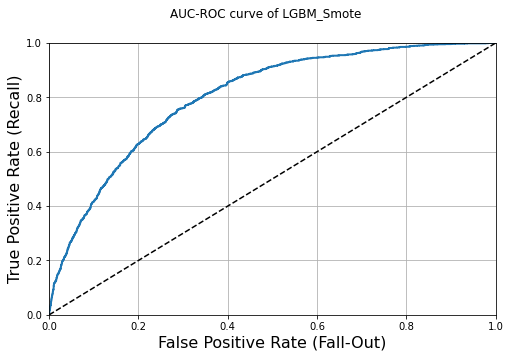

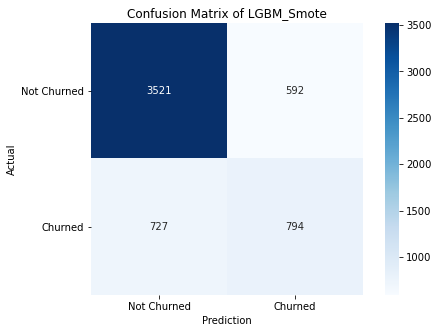

In [154]:
lgbm_c_model_name = 'LGBM_Smote'
lgbm_c_smote = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)

smote_model_names_to_model_objects_map['LGBM_Smote']  = {
        'definition' : lgbm_c_smote,
        'options' : {'scaling_required' : True, 'kfold' : 10}
    }

print("Training : {}".format('LGBM_Smote'))
model_summary_with_smote(lgbm_c_model_name, smote_model_names_to_model_objects_map['LGBM_Smote'], 
                         X_train_full_scaled, 
                         y_train_full, X_train_full_not_scaled, 
                         model_to_evaluation_metrics_with_smote_map, evaluation_metrics)

In [155]:
model_to_mean_evaluation_metrics_with_smote_df = get_model_to_mean_evaluation_metrics_with_smote_df(
    model_to_evaluation_metrics_with_smote_map
    )
model_to_mean_evaluation_metrics_with_smote_df.sort_values(by=['f1.5'],ascending=False)

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0          LR  0.685354  0.630107  0.841196  0.797519   0.521142  0.747247
5         LDA  0.677498  0.622697  0.838220  0.788966   0.514777  0.741742
2          RF  0.666404  0.627118  0.837751  0.740987   0.544078  0.761982
6       B_SVC  0.666219  0.608280  0.832692  0.786008   0.496104  0.735484
1          DT  0.636844  0.591624  0.791567  0.725860   0.499632  0.729318
4         GNB  0.622011  0.568577  0.766290  0.732405   0.464943  0.699860
3         KNN  0.588759  0.548260  0.739152  0.667982   0.465316  0.702872
7  LGBM_Smote  0.536533  0.546376  0.803565  0.522037   0.575239  0.765888

Training : XGBoost_Smote


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      4113
         1.0       0.56      0.51      0.54      1521

    accuracy                           0.76      5634
   macro avg       0.70      0.68      0.69      5634
weighted avg       0.76      0.76      0.76      5634



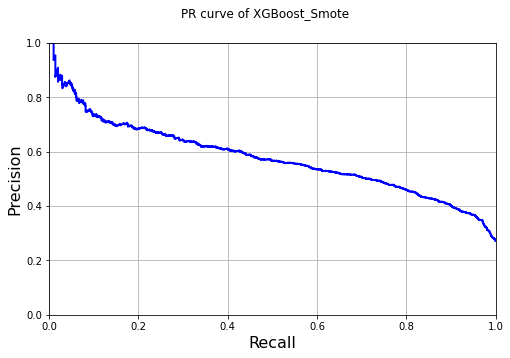

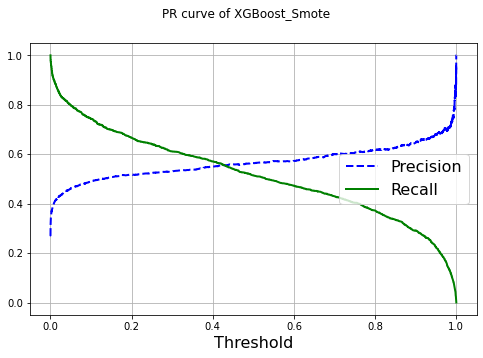

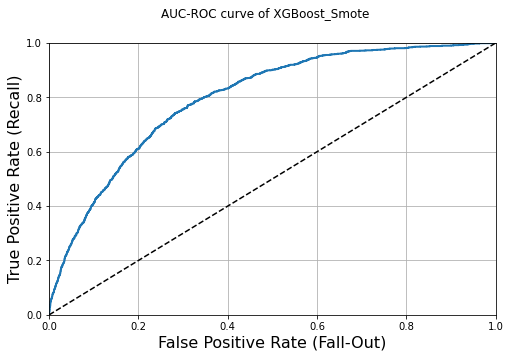

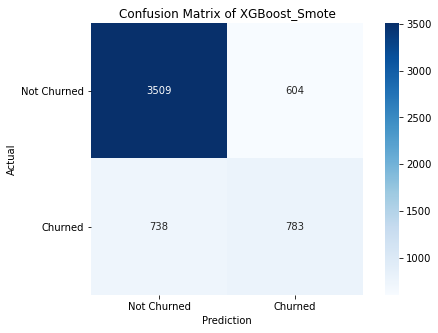

In [156]:

xgc_model_name = 'XGBoost_Smote'
xgc_smote_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)

smote_model_names_to_model_objects_map['XGBoost_Smote']  = {
        'definition' : xgc_smote_model,
        'options' : {'scaling_required' : True, 'kfold' : 10}
    }

print("Training : {}".format('XGBoost_Smote'))
model_summary_with_smote(xgc_model_name, smote_model_names_to_model_objects_map['XGBoost_Smote'], 
                         X_train_full_scaled, 
                         y_train_full, X_train_full_not_scaled, 
                         model_to_evaluation_metrics_with_smote_map, evaluation_metrics)

In [157]:
model_to_mean_evaluation_metrics_with_smote_df = get_model_to_mean_evaluation_metrics_with_smote_df(
    model_to_evaluation_metrics_with_smote_map
    )
model_to_mean_evaluation_metrics_with_smote_df.sort_values(by=['f1.5'],ascending=False)

model_name      f1.5        f1   roc_auc    recall  precision  accuracy
0             LR  0.685354  0.630107  0.841196  0.797519   0.521142  0.747247
5            LDA  0.677498  0.622697  0.838220  0.788966   0.514777  0.741742
2             RF  0.666404  0.627118  0.837751  0.740987   0.544078  0.761982
6          B_SVC  0.666219  0.608280  0.832692  0.786008   0.496104  0.735484
1             DT  0.636844  0.591624  0.791567  0.725860   0.499632  0.729318
4            GNB  0.622011  0.568577  0.766290  0.732405   0.464943  0.699860
3            KNN  0.588759  0.548260  0.739152  0.667982   0.465316  0.702872
7     LGBM_Smote  0.536533  0.546376  0.803565  0.522037   0.575239  0.765888
8  XGBoost_Smote  0.529136  0.538677  0.798202  0.514809   0.565925  0.761805

### Final model selection
We will go with logistic regression model with L1 regularization and C value equal to 0.1 as it has highest f1.5 value of 0.688061.

### Prediction on test set

In [158]:
sm = SMOTE(random_state= 7)
X_train_full_scaled_oversampled, y_train_full_oversampled = sm.fit_sample(X_train_full_scaled, y_train_full)

final_lr_model = LogisticRegression(solver='liblinear', random_state= 42, C= 0.1, penalty= 'l1')
final_lr_model.fit(X_train_full_scaled_oversampled, y_train_full_oversampled)

res = get_X(df_test, categorical_features, numerical_features, scaling_required = True, 
            is_training_data= False, dv = dv_full_scaled)
X_test_scaled = res['X']

y_test_proba = final_lr_model.predict_proba(X_test_scaled)
y_test_scores = y_test_proba[:, 1]
y_test_pred = (y_test_scores > 0.5).astype(int)


/Users/shubhamshukla/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:1487: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


In [159]:
performance_metrics_on_test_set_map = defaultdict(list)
performance_metrics_on_test_set_map['model_name'] = ['Final Logistic Regression Model']
for metric in evaluation_metrics:
    if metric == 'f1.5':
        metric_value = fbeta_score(y_test, y_test_pred, beta=1.5)
    elif metric == 'f1':
        metric_value = f1_score(y_test, y_test_pred)
    elif metric == 'roc_auc':
        metric_value = roc_auc_score(y_test, y_test_scores)
    elif metric == 'recall':
        metric_value = recall_score(y_test, y_test_pred)
    elif metric == 'precision':
        metric_value = precision_score(y_test, y_test_pred)
    elif metric == 'accuracy':
        metric_value = accuracy_score(y_test, y_test_pred)
    performance_metrics_on_test_set_map[metric].append(metric_value)

pd.DataFrame(performance_metrics_on_test_set_map)  

model_name      f1.5        f1   roc_auc    recall  \
0  Final Logistic Regression Model  0.689249  0.624052  0.858678  0.827586   

   precision  accuracy  
0    0.50087  0.753726

###  Using Pickle to save the model

In [160]:
import pickle
 
with open('churn-model-development.bin', 'wb') as f_out:
    pickle.dump((dv_full_scaled, final_lr_model), f_out)

In [161]:
numerical_features

['tenure', 'monthlycharges', 'totalcharges']

In [162]:
categorical_features

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

#### Using model as webservice locally using Flask

In [1]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}


import requests
url = 'http://localhost:9696/predict'
response = requests.post(url, json=customer)
result = response.json()

In [2]:
result

{'churn': False, 'churn_probability': 0.14239450206675558}